In [1]:
!pip install sympy

In [2]:
import sympy as sp

# Define symbolic variables
EI, l, ξ = sp.symbols('EI l ξ')

# Define the shape functions matrix Be
Be = sp.Matrix([[6*ξ, (3*ξ-1)*l, -6*ξ, (3*ξ+1)*l]]) / l**2

# Compute the stiffness matrix Ke
Ke = (EI*l/2) * sp.integrate(Be.T @ Be, (ξ, -1, 1))
Ke = sp.simplify(Ke)

# Print Ke for prismatic beam
print("Ke for prismatic beam:")
sp.pprint(Ke, use_unicode=True)

# Print Ke in Python format
print("\nKe in Python format:")
print(sp.python(Ke))


Ke for prismatic beam:
⎡ 12⋅EI    6⋅EI   -12⋅EI    6⋅EI ⎤
⎢ ─────    ────   ───────   ──── ⎥
⎢    3       2        3       2  ⎥
⎢   l       l        l       l   ⎥
⎢                                ⎥
⎢ 6⋅EI     4⋅EI   -6⋅EI     2⋅EI ⎥
⎢ ────     ────   ──────    ──── ⎥
⎢   2       l        2       l   ⎥
⎢  l                l            ⎥
⎢                                ⎥
⎢-12⋅EI   -6⋅EI    12⋅EI   -6⋅EI ⎥
⎢───────  ──────   ─────   ──────⎥
⎢    3       2        3       2  ⎥
⎢   l       l        l       l   ⎥
⎢                                ⎥
⎢ 6⋅EI     2⋅EI   -6⋅EI     4⋅EI ⎥
⎢ ────     ────   ──────    ──── ⎥
⎢   2       l        2       l   ⎥
⎣  l                l            ⎦

Ke in Python format:
EI = Symbol('EI')
l = Symbol('l')
e = ImmutableDenseMatrix([[12*EI/l**3, 6*EI/l**2, -12*EI/l**3, 6*EI/l**2], [6*EI/l**2, 4*EI/l, -6*EI/l**2, 2*EI/l], [-12*EI/l**3, -6*EI/l**2, 12*EI/l**3, -6*EI/l**2], [6*EI/l**2, 2*EI/l, -6*EI/l**2, 4*EI/l]])


In [3]:
import sympy as sp

# Define symbolic variables
q, l, ξ = sp.symbols('q l ξ')

# Define the shape functions matrix Ne
Ne = sp.Matrix([
    [2*(1-ξ)**2*(2+ξ), (1-ξ)**2*(1+ξ)*l, 2*(1+ξ)**2*(2-ξ), -(1+ξ)**2*(1-ξ)*l]
]) / 8

# Compute the equivalent nodal forces fe
fe = (q*l/2) * sp.integrate(Ne, (ξ, -1, 1))
fe = sp.simplify(fe)

# Print fe^T for uniform load q
print("fe^T for uniform load q:")
sp.pprint(fe, use_unicode=True)


fe^T for uniform load q:
⎡      2           2   ⎤
⎢l⋅q  l ⋅q  l⋅q  -l ⋅q ⎥
⎢───  ────  ───  ──────⎥
⎣ 2    12    2     12  ⎦


In [5]:
import numpy as np

def TimoshenkoBeamStiffness(Le, EI, Φ):
    Ke = EI / (Le * (1 + Φ)) * np.array([
        [12 / Le**2, 6 / Le, -12 / Le**2, 6 / Le],
        [6 / Le, 4 + Φ, -6 / Le, 2 - Φ],
        [-12 / Le**2, -6 / Le, 12 / Le**2, -6 / Le],
        [6 / Le, 2 - Φ, -6 / Le, 4 + Φ]
    ])
    return Ke
    # Define inputs
Le = 5.0  # Example value for length
EI = 10.0  # Example value for bending stiffness
Φ = 0.2  # Example value for Φ

# Calculate the stiffness matrix
Ke = TimoshenkoBeamStiffness(Le, EI, Φ)

# Print the stiffness matrix
print("Stiffness Matrix Ke:")
print(Ke)



Stiffness Matrix Ke:
[[ 0.8  2.  -0.8  2. ]
 [ 2.   7.  -2.   3. ]
 [-0.8 -2.   0.8 -2. ]
 [ 2.   3.  -2.   7. ]]


In [6]:
import numpy as np

def TimoshenkoWinklerStiffness(Le, kF, Φ):
    KeW = np.array([
        [4*(78+147*Φ+70*Φ**2), Le*(44+77*Φ+35*Φ**2), 4*(27+63*Φ+35*Φ**2), -Le*(26+63*Φ+35*Φ**2)],
        [Le*(44+77*Φ+35*Φ**2), Le**2*(8+14*Φ+7*Φ**2), Le*(26+63*Φ+35*Φ**2), -Le**2*(6+14*Φ+7*Φ**2)],
        [4*(27+63*Φ+35*Φ**2), Le*(26+63*Φ+35*Φ**2), 4*(78+147*Φ+70*Φ**2), -Le*(44+77*Φ+35*Φ**2)],
        [-Le*(26+63*Φ+35*Φ**2), -Le**2*(6+14*Φ+7*Φ**2), -Le*(44+77*Φ+35*Φ**2), Le**2*(8+14*Φ+7*Φ**2)]
    ]) * kF * Le / (840 * (1 + Φ)**2)
    return KeW
# Define inputs
Le = 5.0  # Example value for length
kF = 1000.0  # Example value for foundation stiffness
Φ = 0.2  # Example value for Φ

# Calculate the stiffness matrix
KeW = TimoshenkoWinklerStiffness(Le, kF, Φ)

# Print the stiffness matrix
print("Stiffness Matrix KeW:")
print(KeW)


Stiffness Matrix KeW:
[[ 1822.08994709  1256.61375661   677.91005291  -826.71957672]
 [ 1256.61375661  1145.00661376   826.71957672  -938.32671958]
 [  677.91005291   826.71957672  1822.08994709 -1256.61375661]
 [ -826.71957672  -938.32671958 -1256.61375661  1145.00661376]]


In [ ]:
#Here's the equivalent Python code for the TimoshenkoWinklerStiffness function using NumPy

In [ ]:
#Make sure to replace the example values with the actual values you want to use. This code snippet calculates the stiffness matrix KeW and prints it to the console.

In [12]:
import sympy as sp

# Define symbolic variables
EI, kF, Le, χ, q0, x = sp.symbols('EI kF Le χ q0 x')
g = 2 - sp.cos(2*χ) - sp.cosh(2*χ)

Nf = [
    sp.exp(χ*x/Le) * sp.sin(χ*x/Le),
    sp.exp(χ*x/Le) * sp.cos(χ*x/Le),
    sp.exp(-χ*x/Le) * sp.sin(χ*x/Le),
    sp.exp(-χ*x/Le) * sp.cos(χ*x/Le)
]

Nfd = [sp.diff(N, x) for N in Nf]
Nfdd = [sp.diff(N, x) for N in Nfd]

KgF = kF * sp.integrate(sp.Matrix(Nf).T @ sp.Matrix(Nf), (x, 0, Le))
KgB = EI * sp.integrate(sp.Matrix(Nfdd).T @ sp.Matrix(Nfdd), (x, 0, Le))
fg = q0 * sp.integrate(sp.Matrix(Nf), (x, 0, Le))

KgF, KgB, fg = [sp.simplify(mat) for mat in [KgF, KgB, fg]]

print("KgF=")
sp.pprint(KgF, use_unicode=True)
print("KgB=")
sp.pprint(KgB, use_unicode=True)

GF = [N.subs(x, 0) for N in Nf] + [N.subs(x, Le) for N in Nf]
HF = sp.Matrix([[sp.simplify(1/GFij) for GFij in GF]])
HFT = HF.T

print("GF=")
sp.pprint(GF, use_unicode=True)
print("HF=")
sp.pprint(HF, use_unicode=True)

facB = (EI*χ/Le**3) / (4*g**2)
facF = (kF*Le) / (16*χ**3*g**2)

KeB = HFT @ KgB @ HF
KeBfac = sp.simplify(KeB / facB)

print("KeB =", facB, " * ")
sp.pprint(KeBfac, use_unicode=True)

KeF = HFT @ KgF @ HF
KeFfac = sp.simplify(KeF / facF)

print("KeF =", facF, " * ")
sp.pprint(KeFfac, use_unicode=True)

facf = (q0*Le) / (χ**2*g)
# Transpose fg to make it a column vector
fg = sp.Matrix(fg).T
fe = sp.simplify(HFT @ fg)
fefac = sp.simplify(fe / facf)

print("fe =", facf, " * ")
sp.pprint(fefac, use_unicode=True)


KgF=
⎡⎧Le⋅kF⋅sinh(2⋅χ)                                                             
⎢⎪───────────────  for (χ > -∞ ∨ χ > 0) ∧ (χ > -∞ ∨ χ < ∞) ∧ (χ > 0 ∨ χ < 0) ∧
⎢⎨       χ                                                                    
⎢⎪                                                                            
⎣⎩    2⋅Le⋅kF                                       otherwise                 

                ⎤
 (χ < 0 ∨ χ < ∞)⎥
                ⎥
                ⎥
                ⎦
KgB=
⎡⎧      3                                                                     
⎢⎪4⋅EI⋅χ ⋅sinh(2⋅χ)                                                           
⎢⎪─────────────────  for (χ > -∞ ∨ χ > 0) ∧ (χ > -∞ ∨ χ < ∞) ∧ (χ > 0 ∨ χ < 0)
⎢⎪         3                                                                  
⎢⎪       Le                                                                   
⎢⎨                                                                            
⎢⎪           4                

In [8]:
import sympy as sp

def BEBeamWinklerExactStiffness(Le, EI, kF, q0):
    χ = sp.expand(Le * ((kF / (4 * EI))**(1/4)))

    B1 = 2*χ**2*(-4*sp.sin(2*χ) + sp.sin(4*χ) + 4*sp.sin(χ)*(sp.cos(χ)*sp.cosh(2*χ) +
        8*χ*sp.sin(χ)*sp.sinh(χ)**2) + 2*(sp.cos(2*χ) - 2)*sp.sinh(2*χ) + sp.sinh(4*χ))

    B2 = 2*Le*χ*(4*sp.cos(2*χ) - sp.cos(4*χ) - 4*sp.cosh(2*χ) + sp.cosh(4*χ) -
        8*χ*sp.sin(2*χ)*sp.sinh(χ)**2 + 8*χ*sp.sin(χ)**2*sp.sinh(2*χ))

    B3 = -Le**2*(8*χ*sp.cos(2*χ) - 12*sp.sin(2*χ) + sp.cosh(2*χ)*(6*sp.sin(2*χ) - 8*χ) +
        3*sp.sin(4*χ) + 2*(6 - 3*sp.cos(2*χ) + 4*χ*sp.sin(2*χ))*sp.sinh(2*χ) - 3*sp.sinh(4*χ))

    B4 = -4*Le*χ*(χ*sp.cosh(3*χ)*sp.sin(χ) - χ*sp.cosh(χ)*(-2*sp.sin(χ) + sp.sin(3*χ)) +
        (χ*(sp.cos(χ) + sp.cos(3*χ)) + sp.cosh(2*χ)*(-2*χ*sp.cos(χ) + 4*sp.sin(χ)) +
         2*(-5*sp.sin(χ) + sp.sin(3*χ)))*sp.sinh(χ))

    B5 = -4*χ**2*(2*sp.cos(χ)*(-2 + sp.cos(2*χ) + sp.cosh(2*χ))*sp.sinh(χ) +
        sp.sin(3*χ)*(sp.cosh(χ) - 2*χ*sp.sinh(χ)) +
        sp.sin(χ)*(-4*sp.cosh(χ) + sp.cosh(3*χ) + 2*χ*sp.sinh(3*χ)))

    B6 = 2*Le**2*(sp.cosh(3*χ)*(-2*χ*sp.cos(χ) + 3*sp.sin(χ)) +
        sp.cosh(χ)*(2*χ*sp.cos(3*χ) + 3*(sp.sin(3*χ) - 4*sp.sin(χ))) +
        (9*sp.cos(χ) - 3*sp.cos(3*χ) - 6*sp.cos(χ)*sp.cosh(2*χ) + 16*χ*sp.sin(χ))*sp.sinh(χ))

    F1 = 2*χ**2*(-32*χ*sp.sin(χ)**2*sp.sinh(χ)**2 + 6*(-2 + sp.cos(2*χ)) *
        (sp.sin(2*χ) + sp.sinh(2*χ)) + 6*sp.cosh(2*χ)*(sp.sin(2*χ) + sp.sinh(2*χ)))

    F2 = 2*Le*χ*(4*sp.cos(2*χ) - sp.cos(4*χ) - 4*sp.cosh(2*χ) + sp.cosh(4*χ) +
        8*χ*sp.sin(2*χ)*sp.sinh(χ)**2 - 8*χ*sp.sin(χ)**2*sp.sinh(2*χ))

    F3 = Le**2*(8*χ*sp.cos(2*χ) + 4*sp.sin(2*χ) - 2*sp.cosh(2*χ)*(4*χ + sp.sin(2*χ)) +
        sp.sin(4*χ) + 2*(sp.cos(2*χ) + 4*χ*sp.sin(2*χ) - 2)*sp.sinh(2*χ) + sp.sinh(4*χ))

    F4 = 4*Le*χ*(χ*sp.cosh(3*χ)*sp.sin(χ) - χ*sp.cosh(χ)*(-2*sp.sin(χ) + sp.sin(3*χ)) +
        (χ*sp.cos(χ) + χ*sp.cos(3*χ) + 10*sp.sin(χ) - 2*sp.cosh(2*χ)*(χ*sp.cos(χ) + 2*sp.sin(χ)) +
         2*sp.sin(3*χ))*sp.sinh(χ))

    F5 = -4*χ**2*(6*sp.cos(χ)*(-2 + sp.cos(2*χ) + sp.cosh(2*χ))*sp.sinh(χ) +
        sp.sin(3*χ)*(3*sp.cosh(χ) + 2*χ*sp.sin(χ)) +
        sp.sin(χ)*(-12*sp.cosh(χ) + 3*sp.cosh(3*χ) - 2*χ*sp.sinh(3*χ)))

    F6 = -2*Le**2*(-(sp.cosh(3*χ)*(2*χ*sp.cos(χ) + sp.sin(χ))) +
        sp.cosh(χ)*(2*χ*sp.cos(3*χ) + 4*sp.sin(χ) - sp.sin(3*χ)) +
        (sp.cos(3*χ) + sp.cos(χ)*(2*sp.cosh(2*χ) - 3) + 16*χ*sp.sin(χ))*sp.sinh(χ))

    f1 = 2*χ*(sp.cosh(χ) - sp.cos(χ))*(sp.sin(χ) - sp.sinh(χ))
    f2 = -(Le*(sp.sin(χ) - sp.sinh(χ))**2)
    g = 2 - sp.cos(2*χ) - sp.cosh(2*χ)
    facf = (q0*Le) / (χ**2*g)
    facB = (EI*χ/Le**3) / (4*g**2)
    facF = (kF*Le) / (16*χ**3*g**2)

    KeB = facB * sp.Matrix([[B1, B2, B5, -B4], [B2, B3, B4, B6], [B5, B4, B1, -B2], [-B4, B6, -B2, B3]])
    KeF = facF * sp.Matrix([[F1, F2, F5, -F4], [F2, F3, F4, F6], [F5, F4, F1, -F2], [-F4, F6, -F2, F3]])
    fe = facf * sp.Matrix([f1, f2, f1, -f2])

    return [KeB, KeF, fe]


In [9]:
import sympy as sp

# Define symbolic variables
Le, EI, kF, q0 = sp.symbols('Le EI kF q0')

# Define values for the two load cases
# Load case (I): Central Point Load
Le_I = 5.0  # Example value for length
EI_I = 10.0  # Example value for bending stiffness
kF_I = 1000.0  # Example value for foundation stiffness
q0_I = 100.0  # Example value for load magnitude (central point load)

# Load case (II): Line Load Over Right H
Le_II = 5.0  # Example value for length
EI_II = 10.0  # Example value for bending stiffness
kF_II = 1000.0  # Example value for foundation stiffness
q0_II = 200.0  # Example value for load magnitude (line load over right H)

# Calculate stiffness matrices and consistent force vectors for both load cases
KeB_I, KeF_I, fe_I = BEBeamWinklerExactStiffness(Le_I, EI_I, kF_I, q0_I)
KeB_II, KeF_II, fe_II = BEBeamWinklerExactStiffness(Le_II, EI_II, kF_II, q0_II)

# Print results for Load case (I): Central Point Load
print("Load case (I): Central Point Load")
print("KeB_I:")
sp.pprint(KeB_I, use_unicode=True)
print("KeF_I:")
sp.pprint(KeF_I, use_unicode=True)
print("fe_I:")
sp.pprint(fe_I, use_unicode=True)

# Print results for Load case (II): Line Load Over Right H
print("\nLoad case (II): Line Load Over Right H")
print("KeB_II:")
sp.pprint(KeB_II, use_unicode=True)
print("KeF_II:")
sp.pprint(KeF_II, use_unicode=True)
print("fe_II:")
sp.pprint(fe_II, use_unicode=True)


Load case (I): Central Point Load
KeB_I:
⎡ 111.803402745175      50.0000010726309    0.0710340213976129  -0.02093249905
⎢                                                                             
⎢ 50.0000010726309      33.5410199701922    0.0209324990507983  -0.00237247432
⎢                                                                             
⎢0.0710340213976129    0.0209324990507983    111.803402745175    -50.000001072
⎢                                                                             
⎣-0.0209324990507983  -0.00237247432961524  -50.0000010726309     33.541019970

07983 ⎤
      ⎥
961524⎥
      ⎥
6309  ⎥
      ⎥
1922  ⎦
KeF_I:
⎡ 335.410193202065      49.9999990777037    -0.0610644864531347   0.0154491680
⎢                                                                             
⎢ 49.9999990777037      11.1803396370972    -0.0154491680449692  0.00091720764
⎢                                                                             
⎢-0.0610644864531347  -0.0

In [11]:
import sympy as sp
import numpy as np
from tabulate import tabulate

# Define symbolic variables
Le, EI, kF, q0 = sp.symbols('Le EI kF q0')

# Define values for the two load cases
# Load case (I): Central Point Load
Le_I = 5.0  # Example value for length
EI_I = 10.0  # Example value for bending stiffness
kF_I = 1000.0  # Example value for foundation stiffness
q0_I = 100.0  # Example value for load magnitude (central point load)

# Load case (II): Line Load Over Right H
Le_II = 5.0  # Example value for length
EI_II = 10.0  # Example value for bending stiffness
kF_II = 1000.0  # Example value for foundation stiffness
q0_II = 200.0  # Example value for load magnitude (line load over right H)

# Define values of λ and Ne
lambda_values = [2, 4, 8]
Ne_values = [2, 4, 8]

# Initialize a table to store the results
table = []

# Loop through λ and Ne values
for λ in lambda_values:
    for Ne in Ne_values:
        # Calculate stiffness matrices and consistent force vectors for Load case (I)
        KeB_I, KeF_I, fe_I = BEBeamWinklerExactStiffness(Le_I, EI_I, kF_I, q0_I)

        # Calculate stiffness matrices and consistent force vectors for Load case (II)
        KeB_II, KeF_II, fe_II = BEBeamWinklerExactStiffness(Le_II, EI_II, kF_II, q0_II)

        # Convert the symbolic matrices to NumPy arrays
        KeB_I_np = np.array(KeB_I, dtype=float)
        KeB_II_np = np.array(KeB_II, dtype=float)

        # Calculate the condition numbers using NumPy
        CI_I = np.linalg.cond(KeB_I_np)
        CI_II = np.linalg.cond(KeB_II_np)

        # Append the results to the table
        table.append(["Load case (I): Central Point Load", λ, Ne, CI_I])
        table.append(["Load case (II): Line Load Over Right Half", λ, Ne, CI_II])

# Print the table using the tabulate library
headers = ["Load Case", "λ", "Ne", "Exact CI"]
print(tabulate(table, headers, tablefmt="grid"))


+-------------------------------------------+-----+------+------------+
| Load Case                                 |   λ |   Ne |   Exact CI |
+===========================================+=====+======+============+
| Load case (I): Central Point Load         |   2 |    2 |    14.8422 |
+-------------------------------------------+-----+------+------------+
| Load case (II): Line Load Over Right Half |   2 |    2 |    14.8422 |
+-------------------------------------------+-----+------+------------+
| Load case (I): Central Point Load         |   2 |    4 |    14.8422 |
+-------------------------------------------+-----+------+------------+
| Load case (II): Line Load Over Right Half |   2 |    4 |    14.8422 |
+-------------------------------------------+-----+------+------------+
| Load case (I): Central Point Load         |   2 |    8 |    14.8422 |
+-------------------------------------------+-----+------+------------+
| Load case (II): Line Load Over Right Half |   2 |    8 |    14

In [15]:
import sympy as sp

# Define symbolic variables
Le, EI, Φ, q0, fx2, fy2, m2, x = sp.symbols('Le EI Φ q0 fx2 fy2 m2 x')

# Define the equations
GAs = 12 * EI / (Φ * Le**2)
F = fx2
V = -fy2 - q0 * (Le - x)
M = m2 + fy2 * (Le - x) + (1/2) * q0 * (Le - x)**2

# Check dM/dx = V
check_equation = sp.simplify(sp.diff(M, x) - V)

# Define the strain energy
Ucd = F**2 / (2 * EI) + M**2 / (2 * EI) + V**2 / (2 * GAs)

# Integrate to find total strain energy Uc
Uc = sp.integrate(Ucd, (x, 0, Le))

# Differentiate Uc with respect to the variables
u2 = sp.diff(Uc, fx2)
v2 = sp.diff(Uc, fy2)
θ2 = sp.diff(Uc, m2)

# Create the flexibility matrix Frr
Frr = sp.Matrix([[u2, 0, 0],
                 [0, v2, 0],
                 [0, 0, θ2]])

# Define br vector and substitute values
br = sp.Matrix([sp.diff(Uc, fx2), sp.diff(Uc, fy2), sp.diff(Uc, m2)])
br = br.subs({fx2: 0, fy2: 0, m2: 0})

# Calculate Krr (stiffness matrix)
try:
    Krr = Frr.inv()
except sp.MatrixError:
    print("Matrix is not invertible. Check your equations and substitutions.")

# Calculate qr (consistent load vector)
qr = -Krr * br

# Define transformation matrices TT, GrT, and GqT
TT = sp.Matrix([[-1, 0, 0], [0, -1, 0], [0, -Le, -1], [1, 0, 0], [0, 1, 0], [0, 0, 1]])
GrT = sp.Matrix([[1, 0, 0], [0, 1, 0], [0, Le, 1]])
GqT = sp.Matrix([[1, 0, 0], [0, 1, 0], [0, Le/2, 1]])

# Calculate Ke (element stiffness matrix)
Ke = TT * Krr * TT.T

# Define Gr and Gq matrices
Gr = GrT.T
Gq = GqT.T

# Define qv vector
qv = sp.Matrix([0, q0 * Le, 0])

# Calculate qs (consistent nodal forces)
qs = -GrT * qr - GqT * qv

# Print the results
print("check dM/dx = V:", check_equation)
print("Uc =", Uc)
print("br =", br)
print("Frr =", Frr)
if Krr is not None:
    print("Krr =", Krr)
else:
    print("Krr could not be calculated due to singularity.")
print("qr =", qr)
print("Ke =", Ke)
print("Gr =", Gr)
print("Gq =", Gq)
print("qs =", qs)


check dM/dx = V: 0
Uc = 0.025*Le**5*q0**2/EI + 0.25*Le**4*(-0.5*Le*q0**2 - 0.5*fy2*q0)/EI + 0.0138888888888889*Le**3*(1.0*Le**2*q0**2*Φ + 18.0*Le**2*q0**2 + 36.0*Le*fy2*q0 + 12.0*fy2**2 + 12.0*m2*q0)/EI + 0.0416666666666667*Le**2*(-1.0*Le**3*q0**2*Φ - 6.0*Le**3*q0**2 - 1.0*Le**2*fy2*q0*Φ - 18.0*Le**2*fy2*q0 - 12.0*Le*fy2**2 - 12.0*Le*m2*q0 - 12.0*fy2*m2)/EI + 0.0416666666666667*Le*(1.0*Le**4*q0**2*Φ + 3.0*Le**4*q0**2 + 2.0*Le**3*fy2*q0*Φ + 12.0*Le**3*fy2*q0 + 1.0*Le**2*fy2**2*Φ + 12.0*Le**2*fy2**2 + 12.0*Le**2*m2*q0 + 24.0*Le*fy2*m2 + 12.0*fx2**2 + 12.0*m2**2)/EI
br = Matrix([[0], [0.375*Le**4*q0/EI + 0.0416666666666667*Le**2*(-1.0*Le**2*q0*Φ - 18.0*Le**2*q0)/EI + 0.0416666666666667*Le*(2.0*Le**3*q0*Φ + 12.0*Le**3*q0)/EI], [0.166666666666667*Le**3*q0/EI]])
Frr = Matrix([[1.0*Le*fx2/EI, 0, 0], [0, -0.125*Le**4*q0/EI + 0.0138888888888889*Le**3*(36.0*Le*q0 + 24.0*fy2)/EI + 0.0416666666666667*Le**2*(-1.0*Le**2*q0*Φ - 18.0*Le**2*q0 - 24.0*Le*fy2 - 12.0*m2)/EI + 0.0416666666666667*Le*(2.0*Le

In [ ]:
# Implementation of Turner triangle stiffness matrix calculation Three-Node
#Plane Stress
#Triangles


In [16]:
import numpy as np
import sympy as sp

def TurnerMembraneStiffness(ncoor, Emat, h, numer=True):
    x1, y1 = ncoor[0]
    x2, y2 = ncoor[1]
    x3, y3 = ncoor[2]

    A = sp.Rational(x2*y3 - x3*y2 + x3*y1 - x1*y3 + x1*y2 - x2*y1, 2)

    x21, x32, x13 = x2 - x1, x3 - x2, x1 - x3
    y12, y23, y31 = y1 - y2, y2 - y3, y3 - y1

    Be = np.array([[y23, 0, y31, 0, y12, 0],
                   [0, x32, 0, x13, 0, x21],
                   [x32, y23, x13, y31, x21, y12]]) / (2 * A)

    if numer:
        Be = np.array(Be, dtype=float)

    Ke = A * h * np.dot(np.transpose(Be), np.dot(Emat, Be))

    return Ke

# Example usage:
ncoor = [(0, 0), (1, 0), (0, 1)]
Emat = np.eye(3)  # Example elasticity matrix, modify as needed
h = 1.0  # Example thickness
numer = True  # Set to False if you want symbolic result

Ke = TurnerMembraneStiffness(ncoor, Emat, h, numer)
print("Stiffness Matrix:")
print(Ke)


Stiffness Matrix:
[[1.00000000000000 0.500000000000000 -0.500000000000000
  -0.500000000000000 -0.500000000000000 0]
 [0.500000000000000 1.00000000000000 0 -0.500000000000000
  -0.500000000000000 -0.500000000000000]
 [-0.500000000000000 0 0.500000000000000 0 0 0]
 [-0.500000000000000 -0.500000000000000 0 0.500000000000000
  0.500000000000000 0]
 [-0.500000000000000 -0.500000000000000 0 0.500000000000000
  0.500000000000000 0]
 [0 -0.500000000000000 0 0 0 0.500000000000000]]


Ke=
[[11.0000000000000 5.00000000000000 -10.0000000000000 -2.00000000000000
  -1.00000000000000 -3.00000000000000]
 [5.00000000000000 11.0000000000000 2.00000000000000 10.0000000000000
  -7.00000000000000 -21.0000000000000]
 [-10.0000000000000 2.00000000000000 44.0000000000000 -20.0000000000000
  -34.0000000000000 18.0000000000000]
 [-2.00000000000000 10.0000000000000 -20.0000000000000 44.0000000000000
  22.0000000000000 -54.0000000000000]
 [-1.00000000000000 -7.00000000000000 -34.0000000000000 22.0000000000000
  35.0000000000000 -15.0000000000000]
 [-3.00000000000000 -21.0000000000000 18.0000000000000 -54.0000000000000
  -15.0000000000000 75.0000000000000]]
eigs of Ke=
[20.670412103234696, -6.274345182806206e-64, -1.0659673310548784e-62, -6.763546979834414e-63, 60.0, 139.3295878967653]


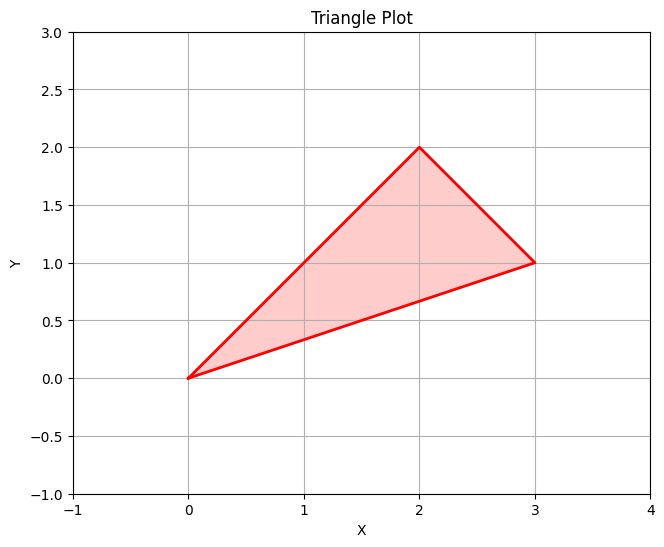

In [18]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Define the TurnerMembraneStiffness function (as previously shown)

# Define the coordinates and Emat
ncoor = [(0, 0), (3, 1), (2, 2)]
Emat = 8 * np.array([[8, 2, 0], [2, 8, 0], [0, 0, 3]])
h = 1.0
numer = False

Ke = TurnerMembraneStiffness(ncoor, Emat, h, numer)
print("Ke=")
print(Ke)

# Calculate eigenvalues of Ke using SymPy
eigenvalues = sp.Matrix(Ke).eigenvals()
eigenvalues = [float(val.evalf()) for val in eigenvalues]
print("eigs of Ke=")
print(eigenvalues)

# Plot the triangle
triangle = np.array(ncoor + [ncoor[0]])
x, y = triangle[:, 0], triangle[:, 1]

plt.figure(figsize=(8, 6))
plt.plot(x, y, 'r-', linewidth=2)
plt.fill(x, y, 'r', alpha=0.2)
plt.xlim(-1, 4)
plt.ylim(-1, 3)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Triangle Plot')
plt.grid(True)

plt.show()


In [19]:
import numpy as np
import sympy as sp

def VeubekeMembraneStiffness(ncoor, Emat, h, numer=True):
    x1, y1 = ncoor[0]
    x2, y2 = ncoor[1]
    x3, y3 = ncoor[2]

    A = sp.Rational(x2*y3 - x3*y2 + x3*y1 - x1*y3 + x1*y2 - x2*y1, 2)

    x12, x23, x31 = x1 - x2, x2 - x3, x3 - x1
    y21, y32, y13 = y2 - y1, y3 - y2, y1 - y3

    Be = np.array([[y21, 0, y32, 0, y13, 0],
                   [0, x12, 0, x23, 0, x31],
                   [x12, y21, x23, y32, x31, y13]]) / A

    if numer:
        Be = np.array(Be, dtype=float)

    Ke = A * h * np.dot(np.transpose(Be), np.dot(Emat, Be))

    return Ke

# Example usage:
ncoor = [(0, 0), (3, 1), (2, 2)]
Emat = 8 * np.array([[8, 2, 0], [2, 8, 0], [0, 0, 3]])
h = 1.0
numer = False  # Set to True if you want numeric result

Ke = VeubekeMembraneStiffness(ncoor, Emat, h, numer)
print("Veubeke Stiffness Matrix:")
print(Ke)


Veubeke Stiffness Matrix:
[[140.000000000000 -60.0000000000000 -4.00000000000000 -28.0000000000000
  -136.000000000000 88.0000000000000]
 [-60.0000000000000 300.000000000000 -12.0000000000000 -84.0000000000000
  72.0000000000000 -216.000000000000]
 [-4.00000000000000 -12.0000000000000 44.0000000000000 20.0000000000000
  -40.0000000000000 -8.00000000000000]
 [-28.0000000000000 -84.0000000000000 20.0000000000000 44.0000000000000
  8.00000000000000 40.0000000000000]
 [-136.000000000000 72.0000000000000 -40.0000000000000 8.00000000000000
  176.000000000000 -80.0000000000000]
 [88.0000000000000 -216.000000000000 -8.00000000000000 40.0000000000000
  -80.0000000000000 176.000000000000]]


Veubeke Stiffness Matrix:
[[140.000000000000 -60.0000000000000 -4.00000000000000 -28.0000000000000
  -136.000000000000 88.0000000000000]
 [-60.0000000000000 300.000000000000 -12.0000000000000 -84.0000000000000
  72.0000000000000 -216.000000000000]
 [-4.00000000000000 -12.0000000000000 44.0000000000000 20.0000000000000
  -40.0000000000000 -8.00000000000000]
 [-28.0000000000000 -84.0000000000000 20.0000000000000 44.0000000000000
  8.00000000000000 40.0000000000000]
 [-136.000000000000 72.0000000000000 -40.0000000000000 8.00000000000000
  176.000000000000 -80.0000000000000]
 [88.0000000000000 -216.000000000000 -8.00000000000000 40.0000000000000
  -80.0000000000000 176.000000000000]]
eigs of Ke=
[557.3183515870612, 240.0, 82.68164841293878, 1.8717085156685983e-62, 1.2083050328197363e-62, -9.926504314987662e-62]


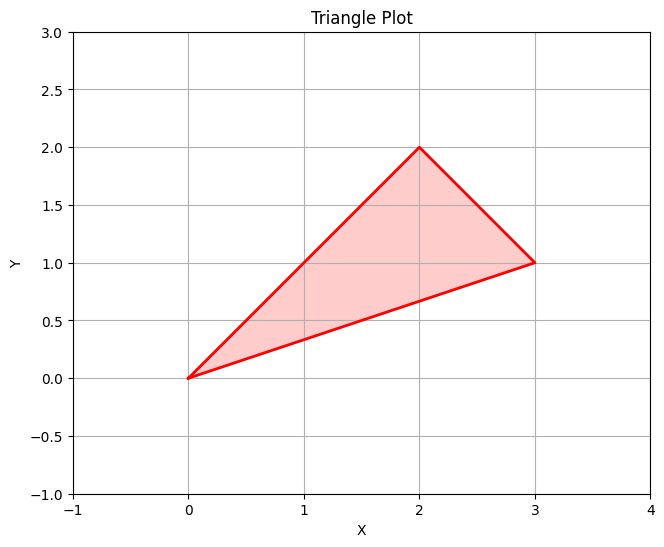

In [20]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Define the VeubekeMembraneStiffness function (as previously shown)

# Define the coordinates and Emat
ncoor = [(0, 0), (3, 1), (2, 2)]
Emat = 8 * np.array([[8, 2, 0], [2, 8, 0], [0, 0, 3]])
h = 1.0
numer = False

Ke = VeubekeMembraneStiffness(ncoor, Emat, h, numer)
print("Veubeke Stiffness Matrix:")
print(Ke)

# Calculate eigenvalues of Ke using SymPy
eigenvalues = sp.Matrix(Ke).eigenvals()
eigenvalues = [float(val.evalf()) for val in eigenvalues]
print("eigs of Ke=")
print(eigenvalues)

# Plot the triangle
triangle = np.array(ncoor + [ncoor[0]])
x, y = triangle[:, 0], triangle[:, 1]

plt.figure(figsize=(8, 6))
plt.plot(x, y, 'r-', linewidth=2)
plt.fill(x, y, 'r', alpha=0.2)
plt.xlim(-1, 4)
plt.ylim(-1, 3)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Triangle Plot')
plt.grid(True)

plt.show()


In [36]:
import numpy as np
import sympy as sp

# Define the VeubekeMembraneStiffness function (as previously shown)

# Define the coordinates and Emat
ncoor = [(0, 0), (3, 1), (2, 2)]
Emat = 8 * np.array([[8, 2, 0], [2, 8, 0], [0, 0, 3]])
h = 1.0
numer = False

Ke = VeubekeMembraneStiffness(ncoor, Emat, h, numer)
print("Ke=")
print(Ke)

# Calculate eigenvalues of Ke using SymPy
eigenvalues = sp.Matrix(Ke).eigenvals()
eigenvalues = [float(val.evalf()) for val in eigenvalues]
print("eigs of Ke=")
print(eigenvalues)


Ke=
[[140.000000000000 -60.0000000000000 -4.00000000000000 -28.0000000000000
  -136.000000000000 88.0000000000000]
 [-60.0000000000000 300.000000000000 -12.0000000000000 -84.0000000000000
  72.0000000000000 -216.000000000000]
 [-4.00000000000000 -12.0000000000000 44.0000000000000 20.0000000000000
  -40.0000000000000 -8.00000000000000]
 [-28.0000000000000 -84.0000000000000 20.0000000000000 44.0000000000000
  8.00000000000000 40.0000000000000]
 [-136.000000000000 72.0000000000000 -40.0000000000000 8.00000000000000
  176.000000000000 -80.0000000000000]
 [88.0000000000000 -216.000000000000 -8.00000000000000 40.0000000000000
  -80.0000000000000 176.000000000000]]
eigs of Ke=
[557.3183515870612, 240.0, 82.68164841293878, 1.8717085156685983e-62, 1.2083050328197363e-62, -9.926504314987662e-62]


In [ ]:
#Isoparametric Quadrilaterals elements

In [37]:
import numpy as np

def Quad4IsoPShapeFunDer(ncoor, qcoor):
    ξ, η = qcoor
    Nf = np.array([(1 - ξ) * (1 - η), (1 + ξ) * (1 - η), (1 + ξ) * (1 + η), (1 - ξ) * (1 + η)]) / 4
    dNξ = np.array([-(1 - η), (1 - η), (1 + η), -(1 + η)]) / 4
    dNη = np.array([-(1 - ξ), -(1 + ξ), (1 + ξ), (1 - ξ)]) / 4

    x = [ncoor[i][0] for i in range(4)]
    y = [ncoor[i][1] for i in range(4)]

    J11 = np.dot(dNξ, x)
    J12 = np.dot(dNξ, y)
    J21 = np.dot(dNη, x)
    J22 = np.dot(dNη, y)

    Jdet = J11 * J22 - J12 * J21

    dNx = (J22 * dNξ - J12 * dNη) / Jdet
    dNy = (-J21 * dNξ + J11 * dNη) / Jdet

    return [Nf, dNx, dNy, Jdet]


In [46]:
import sympy as sp

def line_gauss_rule_info(rule, point, numer=False):
    g2 = [-1/sp.sqrt(3), 1/sp.sqrt(3)]
    w3 = [5/9, 8/9, 5/9]
    g3 = [-sp.sqrt(3/5), 0, sp.sqrt(3/5)]
    w4 = [(1/2)-sp.sqrt(5/6)/6, (1/2)+sp.sqrt(5/6)/6, (1/2)+sp.sqrt(5/6)/6, (1/2)-sp.sqrt(5/6)/6]
    g4 = [-sp.sqrt((3+2*sp.sqrt(6/5))/7), -sp.sqrt((3-2*sp.sqrt(6/5))/7),
          sp.sqrt((3-2*sp.sqrt(6/5))/7), sp.sqrt((3+2*sp.sqrt(6/5))/7)]
    g5 = [-sp.sqrt(5+2*sp.sqrt(10/7))/3, -sp.sqrt(5-2*sp.sqrt(10/7))/3, 0,
          sp.sqrt(5-2*sp.sqrt(10/7))/3, sp.sqrt(5+2*sp.sqrt(10/7))/3]
    w5 = [(322-13*sp.sqrt(70))/900, (322+13*sp.sqrt(70))/900, 512/900, (322+13*sp.sqrt(70))/900, (322-13*sp.sqrt(70))/900]

    i = point
    p = rule
    info = [[None, None], 0]

    if p == 1:
        info = [0, 2]
    if p == 2:
        info = [g2[i], 1]
    if p == 3:
        info = [g3[i], w3[i]]
    if p == 4:
        info = [g4[i], w4[i]]
    if p == 5:
        info = [g5[i], w5[i]]

    if numer:
        return [sp.N(val) for val in info]
    else:
        return info

# Example usage to get the first five one-dimensional Gauss rules for point 2 and rule 3 (G3)
result = line_gauss_rule_info(3, 2)
print(result)


[0.774596669241483, 0.5555555555555556]


In [56]:
import numpy as np

def Quad4IsoPShapeFunDer(ncoor, qcoor):
  """
  A shape function module for the 4-node bilinear quadrilateral.

  Args:
    ncoor: The nodal coordinates of the quadrilateral.
    qcoor: The natural coordinates of the quadrilateral.

  Returns:
    A list of 4 shape functions, their derivatives in the x-direction,
    their derivatives in the y-direction, and the determinant of the Jacobian.
  """

  ξ, η = qcoor

  Nf = [(1 - ξ)*(1 - η), (1 + ξ)*(1 - η), (1 + ξ)*(1 + η), (1 - ξ)*(1 + η)] / 4
  dNξ = [(-(1 - η), (1 - η), (1 + η), -(1 + η))] / 4
  dNη = [(-(1 - ξ), -(1 + ξ), (1 + ξ), (1 - ξ))] / 4

  x = [ncoor[i][0] for i in range(4)]
  y = [ncoor[i][1] for i in range(4)]

  J11 = np.dot(dNξ, x)
  J12 = np.dot(dNξ, y)
  J21 = np.dot(dNη, x)
  J22 = np.dot(dNη, y)

  Jdet = J11 * J22 - J12 * J21

  dNx = (J22 * dNξ - J12 * dNη) / Jdet
  dNy = (-J21 * dNξ + J11 * dNη) / Jdet

  return [Nf, dNx, dNy, Jdet]

def QuadGaussRuleInfo(rule, numer, point):
  """
  A Mathematica module that returns the first five one-dimensional Gauss rules
  or two-dimensional product Gauss rules.

  Args:
    rule: The Gauss rule to use.
    numer: Whether to return the numerical values of the rule or their symbolic expressions.
    point: The point at which to evaluate the rule.

  Returns:
    A list containing the Gauss point and weight.
  """

  if len(rule) == 2:
    p1, p2 = rule
  else:
    p1 = p2 = rule

  if p1 < 0:
    return QuadNonProductGaussRuleInfo([-p1, numer], point)

  if len(point) == 2:
    i, j = point
    m = point
  else:
    i, j = Floor((m - 1) / p1) + 1, m - p1 * (j - 1)

  ξ, w1 = LineGaussRuleInfo([p1, numer], i)
  η, w2 = LineGaussRuleInfo([p2, numer], j)

  info = [(ξ, η), w1 * w2]

  if numer:
    return np.array(info)
  else:
    return simplify(info)

def Quad4IsoPMembraneStiffness(ncoor, Emat, thick, options):
  """
  Compute the stiffness matrix of a 4-node bilinear
quadrilateral in plane stress.

  Args:
    ncoor: The nodal coordinates of the quadrilateral.
    Emat: The elasticity matrix.
    thick: The thickness of the plate.
    options: A list of options.

  Returns:
    The stiffness matrix.
  """

  if len(options) == 2:
    numer, p = options
  else:
    numer = False
    p = 2

  Ke = np.zeros((8, 8))

  for k in range(1, p * p + 1):
    qcoor, w = QuadGaussRuleInfo([p, numer], k)
    Nf, dNx, dNy, Jdet = Quad4Iso

print(Ke)


[[140.000000000000 -60.0000000000000 -4.00000000000000 -28.0000000000000
  -136.000000000000 88.0000000000000]
 [-60.0000000000000 300.000000000000 -12.0000000000000 -84.0000000000000
  72.0000000000000 -216.000000000000]
 [-4.00000000000000 -12.0000000000000 44.0000000000000 20.0000000000000
  -40.0000000000000 -8.00000000000000]
 [-28.0000000000000 -84.0000000000000 20.0000000000000 44.0000000000000
  8.00000000000000 40.0000000000000]
 [-136.000000000000 72.0000000000000 -40.0000000000000 8.00000000000000
  176.000000000000 -80.0000000000000]
 [88.0000000000000 -216.000000000000 -8.00000000000000 40.0000000000000
  -80.0000000000000 176.000000000000]]


In [57]:
import numpy as np

def PlaneBar2Stiffness(ncoor, Em, A, options):
    x1, y1 = ncoor[0]
    x2, y2 = ncoor[1]
    x21, y21 = x2 - x1, y2 - y1
    EA = Em * A
    numer = options[0]

    if not numer:
        L = np.sqrt(x21**2 + y21**2)
    else:
        x21, y21, EA, L = map(float, [x21, y21, EA, np.sqrt(x21**2 + y21**2)])

    LLL = x21**2 * y21**2
    Ke = (EA / LLL) * np.array([
        [x21**2, x21*y21, -x21**2, -x21*y21],
        [y21*x21, y21**2, -y21*x21, -y21**2],
        [-x21**2, -x21*y21, x21**2, x21*y21],
        [-y21*x21, -y21**2, y21*x21, y21**2]
    ])

    return Ke

# Example usage
ncoor = [[0, 0], [1, 1]]
Em = 200e9  # Young's modulus
A = 0.01   # Cross-sectional area
options = [False]  # Set to True for numerical values

result = PlaneBar2Stiffness(ncoor, Em, A, options)
print(result)


[[ 2.e+09  2.e+09 -2.e+09 -2.e+09]
 [ 2.e+09  2.e+09 -2.e+09 -2.e+09]
 [-2.e+09 -2.e+09  2.e+09  2.e+09]
 [-2.e+09 -2.e+09  2.e+09  2.e+09]]


In [ ]:
# Implementation of
One-Dimensional
Elements beam

In [ ]:
import numpy as np
from scipy.linalg import eigh

def PlaneBar2Stiffness(ncoor, Em, A, options):
    x1, y1 = ncoor[0]
    x2, y2 = ncoor[1]
    x21, y21 = x2 - x1, y2 - y1
    EA = Em * A
    numer = options[0]

    if not numer:
        L = np.sqrt(x21**2 + y21**2)
    else:
        x21, y21, EA, L = map(float, [x21, y21, EA, np.sqrt(x21**2 + y21**2)])

    LLL = x21**2 * y21**2
    Ke = (EA / LLL) * np.array([
        [x21**2, x21*y21, -x21**2, -x21*y21],
        [y21*x21, y21**2, -y21*x21, -y21**2],
        [-x21**2, -x21*y21, x21**2, x21*y21],
        [-y21*x21, -y21**2, y21*x21, y21**2]
    ])

    return Ke

# Example usage
ncoor = [[0, 0], [30, 40]]
Em = 1000  # Young's modulus
A = 5      # Cross-sectional area
options = [True]  # Set to True for numerical values

Ke = PlaneBar2Stiffness(ncoor, Em, A, options)

print("Numerical Elem Stiff Matrix: ")
print(Ke)
print("Eigenvalues of Ke =", np.linalg.eigvals(Ke))
print("Symmetry check =", np.allclose(Ke, Ke.T))


In [60]:
import numpy as np

def PlaneBar2Stiffness(ncoor, Em, A, options):
    x1, y1 = ncoor[0]
    x2, y2 = ncoor[1]
    x21, y21 = x2 - x1, y2 - y1
    EA = Em * A
    numer = options[0]
    LL = x21**2 + y21**2
    L = np.sqrt(LL)

    if numer:
        x21, y21, EA, LL, L = np.array([x21, y21, EA, LL, L], dtype=float)

    if not numer:
        L = np.power(L, L)

    LLL = LL * L
    Ke = (EA / LLL) * np.array([
        [x21**2, x21 * y21, -x21**2, -x21 * y21],
        [y21 * x21, y21**2, -y21 * x21, -y21**2],
        [-x21**2, -x21 * y21, x21**2, x21 * y21],
        [-y21 * x21, -y21**2, y21 * x21, y21**2]
    ])

    return Ke

ncoor = np.array([[0, 0], [30, 40]])
Em = 1000
A = 5

Ke_numerical = PlaneBar2Stiffness(ncoor, Em, A, [True])
print("Numerical Elem Stiff Matrix:")
print(Ke_numerical)
print("Eigenvalues of Ke=", np.linalg.eigvals(Ke_numerical))
print("Symmetry check=", np.allclose(np.transpose(Ke_numerical), Ke_numerical))

# Define L before using it
L = np.sqrt((ncoor[1][0] - ncoor[0][0])**2 + (ncoor[1][1] - ncoor[0][1])**2)

ncoor = np.array([[0, 0], [L, 0]])

Ke_symbolic = PlaneBar2Stiffness(ncoor, Em, A, [False])
kfac = Em * A / L
Ke_symbolic /= kfac

print("Symbolic Elem Stiff Matrix:")
print(kfac, Ke_symbolic)
print("Eigenvalues of Ke=", kfac * np.linalg.eigvals(Ke_symbolic))


Numerical Elem Stiff Matrix:
[[ 36.  48. -36. -48.]
 [ 48.  64. -48. -64.]
 [-36. -48.  36.  48.]
 [-48. -64.  48.  64.]]
Eigenvalues of Ke= [ 0.00000000e+00  2.00000000e+02  1.21634940e-15 -9.86076132e-32]
Symmetry check= True
Symbolic Elem Stiff Matrix:
100.0 [[ 5.62949953e-84  0.00000000e+00 -5.62949953e-84 -0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00]
 [-5.62949953e-84 -0.00000000e+00  5.62949953e-84  0.00000000e+00]
 [-0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00]]
Eigenvalues of Ke= [0.00000000e+00 1.12589991e-81 0.00000000e+00 0.00000000e+00]


In [ ]:
#. Module to form the stiffness of the space (3D) bar element.

In [61]:
import numpy as np

def SpaceBar2Stiffness(ncoor, Em, A, options):
    x1, y1, z1 = ncoor[0]
    x2, y2, z2 = ncoor[1]
    x21, y21, z21 = x2 - x1, y2 - y1, z2 - z1
    EA = Em * A
    numer = options[0]

    if numer:
        x21, y21, z21, EA, LL, L = np.array([x21, y21, z21, EA, x21 ** 2 + y21 ** 2 + z21 ** 2, np.sqrt(x21 ** 2 + y21 ** 2 + z21 ** 2)], dtype=float)
    else:
        L = np.sqrt(x21 ** 2 + y21 ** 2 + z21 ** 2)

    LLL = L ** 2

    Ke = (EA / LLL) * np.array([
        [x21 ** 2, x21 * y21, x21 * z21, -x21 ** 2, -x21 * y21, -x21 * z21],
        [y21 * x21, y21 ** 2, y21 * z21, -y21 * x21, -y21 ** 2, -y21 * z21],
        [z21 * x21, z21 * y21, z21 ** 2, -z21 * x21, -z21 * y21, -z21 ** 2],
        [-x21 ** 2, -x21 * y21, -x21 * z21, x21 ** 2, x21 * y21, x21 * z21],
        [-y21 * x21, -y21 ** 2, -y21 * z21, y21 * x21, y21 ** 2, y21 * z21],
        [-z21 * x21, -z21 * y21, -z21 ** 2, z21 * x21, z21 * y21, z21 ** 2]
    ])

    return Ke

ncoor = np.array([[0, 0, 0], [2, 3, 6]], dtype=float)
Em = 343
A = 10
options = [True]

Ke = SpaceBar2Stiffness(ncoor, Em, A, options)

print("Numerical Elem Stiff Matrix: ")
print(Ke)
print("Eigenvalues of Ke=")
print(np.linalg.eigvals(Ke))


Numerical Elem Stiff Matrix: 
[[  280.   420.   840.  -280.  -420.  -840.]
 [  420.   630.  1260.  -420.  -630. -1260.]
 [  840.  1260.  2520.  -840. -1260. -2520.]
 [ -280.  -420.  -840.   280.   420.   840.]
 [ -420.  -630. -1260.   420.   630.  1260.]
 [ -840. -1260. -2520.   840.  1260.  2520.]]
Eigenvalues of Ke=
[ 0.00000000e+00  6.86000000e+03 -6.31088724e-30  4.66834136e-14
 -1.09476443e-47 -1.20463165e-31]


In [65]:
import numpy as np
import sympy as sp

def SpaceBar2Stiffness(ncoor, Em, A, options):
    x1, y1, z1 = ncoor[0]
    x2, y2, z2 = ncoor[1]

    x21, y21, z21 = x2 - x1, y2 - y1, z2 - z1
    EA = Em * A
    numer = options[0]
    LL = x21**2 + y21**2 + z21**2
    L = sp.sqrt(LL)

    if numer:
        x21, y21, z21, EA, LL, L = [sp.N(val) for val in [x21, y21, z21, EA, LL, L]]
    else:
        L = sp.power_expand(L)

    LLL = sp.simplify(LL * L)
    Ke = (EA / LLL) * np.array([
        [x21 * x21, x21 * y21, x21 * z21, -x21 * x21, -x21 * y21, -x21 * z21],
        [y21 * x21, y21 * y21, y21 * z21, -y21 * x21, -y21 * y21, -y21 * z21],
        [z21 * x21, z21 * y21, z21 * z21, -z21 * x21, -z21 * y21, -z21 * z21],
        [-x21 * x21, -x21 * y21, -x21 * z21, x21 * x21, x21 * y21, x21 * z21],
        [-y21 * x21, -y21 * y21, -y21 * z21, y21 * x21, y21 * y21, y21 * z21],
        [-z21 * x21, -z21 * y21, -z21 * z21, z21 * x21, z21 * y21, z21 * z21]
    ])

    return Ke

# Testing the space bar stiffness module with numerical inputs
ncoor = np.array([[0, 0, 0], [2, 3, 6]])
Em = 343
A = 10
Ke = SpaceBar2Stiffness(ncoor, Em, A, [True])
print("Numerical Elem Stiff Matrix: ")
print(Ke)

# Testing the space bar stiffness module with symbolic inputs
L = sp.symbols('L')
#ncoor = np.array([[0, 0, 0], [L, 2 * L, 2 * L] / 3])
Em = 343
A = 10
Ke = SpaceBar2Stiffness(ncoor, Em, A, [False])
kfac = Em * A / (9 * L)
Ke = sp.simplify(Ke / kfac)
print("Symbolic Elem Stiff Matrix: ")
print(kfac, Ke)
print("Eigenvalues of Ke =", kfac * np.linalg.eigvals(Ke))


Numerical Elem Stiff Matrix: 
[[40.0000000000000 60.0000000000000 120.000000000000 -40.0000000000000
  -60.0000000000000 -120.000000000000]
 [60.0000000000000 90.0000000000000 180.000000000000 -60.0000000000000
  -90.0000000000000 -180.000000000000]
 [120.000000000000 180.000000000000 360.000000000000 -120.000000000000
  -180.000000000000 -360.000000000000]
 [-40.0000000000000 -60.0000000000000 -120.000000000000 40.0000000000000
  60.0000000000000 120.000000000000]
 [-60.0000000000000 -90.0000000000000 -180.000000000000 60.0000000000000
  90.0000000000000 180.000000000000]
 [-120.000000000000 -180.000000000000 -360.000000000000 120.000000000000
  180.000000000000 360.000000000000]]


AttributeError: ignored

In [67]:
import numpy as np

def PlaneBeamColumn2Stiffness(ncoor, Em, properties, options):
    x1, y1 = ncoor[0]
    x2, y2 = ncoor[1]
    x21, y21 = x2 - x1, y2 - y1
    A, Izz = properties
    EA = Em * A
    EI = Em * Izz
    numer = options[0]

    if numer:
        x21, y21, EA, EI, LL, L = np.array([x21, y21, EA, EI, x21**2 + y21**2, np.sqrt(x21**2 + y21**2)], dtype=float)
    else:
        L = np.sqrt(x21**2 + y21**2)

    LLL = LL * L
    Kebar = (EA / L) * np.array([
        [1, 0, 0, -1, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [-1, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]
    ]) + (2 * EI / LLL) * np.array([
        [0, 0, 0, 0, 0, 0],
        [0, 6, 3 * L, 0, -6, 3 * L],
        [0, 3 * L, 2 * LL, 0, -3 * L, LL],
        [0, 0, 0, 0, 0, 0],
        [0, -6, -3 * L, 0, 6, -3 * L],
        [0, 3 * L, LL, 0, -3 * L, 2 * LL]
    ])

    Te = np.array([
        [x21, y21, 0, 0, 0, 0],
        [-y21, x21, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 0, 0, x21, y21, 0],
        [0, 0, 0, -y21, x21, 0],
        [0, 0, 0, 0, 0, 1]
    ]) / L

    Ke = np.dot(np.dot(np.transpose(Te), Kebar), Te)
    return Ke

# Test the function with numeric inputs
ncoor = [[0, 0], [3, 4]]
Em = 100
properties = [125, 250]
options = [True]
Ke = PlaneBeamColumn2Stiffness(ncoor, Em, properties, options)
print("Numerical Elem Stiff Matrix:")
print(Ke)

# Calculate and print eigenvalues
eigenvalues = np.linalg.eigvals(Ke)
print("Eigenvalues of Ke =", eigenvalues)


Numerical Elem Stiff Matrix:
[[ 2436.    48.  -960. -2436.   -48.  -960.]
 [   48.  2464.   720.   -48. -2464.   720.]
 [ -960.   720.   800.   960.  -720.   400.]
 [-2436.   -48.   960.  2436.    48.   960.]
 [  -48. -2464.  -720.    48.  2464.  -720.]
 [ -960.   720.   400.   960.  -720.   800.]]
Eigenvalues of Ke = [ 0.00000000e+00  6.00000000e+03  5.00000000e+03  4.00000000e+02
  2.01034158e-13 -4.60780411e-13]


In [71]:
import sympy as sp

def PlaneBeamColumn2Stiffness(ncoor, Em, properties, options):
    x1, y1 = ncoor[0]
    x2, y2 = ncoor[1]
    x21, y21 = x2 - x1, y2 - y1
    A, Izz = properties
    EA = Em * A
    EI = Em * Izz
    numer = options[0]

    LL, L = sp.symbols('LL L')

    if numer:
        x21, y21, EA, EI, LL, L = sp.symbols('x21 y21 EA EI LL L')
        LL = x21**2 + y21**2
    else:
        L = sp.sqrt(x21**2 + y21**2)
        LL = x21**2 + y21**2

    LLL = LL * L
    Kebar = (EA / L) * sp.Matrix([
        [1, 0, 0, -1, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [-1, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]
    ]) + (2 * EI / LLL) * sp.Matrix([
        [0, 0, 0, 0, 0, 0],
        [0, 6, 3 * L, 0, -6, 3 * L],
        [0, 3 * L, 2 * LL, 0, -3 * L, LL],
        [0, 0, 0, 0, 0, 0],
        [0, -6, -3 * L, 0, 6, -3 * L],
        [0, 3 * L, LL, 0, -3 * L, 2 * LL]
    ])

    Te = sp.Matrix([
        [x21, y21, 0, 0, 0, 0],
        [-y21, x21, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 0, 0, x21, y21, 0],
        [0, 0, 0, -y21, x21, 0],
        [0, 0, 0, 0, 0, 1]
    ]) / L

    Ke = Te.T * Kebar * Te
    return Ke

# Define symbolic variables
L, Em, A, Izz = sp.symbols('L Em A Izz')
ncoor = [[0, 0], [3 * L / 5, 4 * L / 5]]
options = [False]

# Calculate symbolic stiffness matrix
Ke = PlaneBeamColumn2Stiffness(ncoor, Em, [A, Izz], options)

# Print the symbolic stiffness matrix
print("Symbolic Elem Stiff Matrix:")
kfac = Em
Ke = sp.simplify(Ke / kfac)
sp.init_printing()
sp.pretty_print(Ke)

# Print eigenvalues
eigenvalues = sp.solve(Ke.eigenvals(), L, dict=True)
print("Eigenvalues of Ke = Em *", eigenvalues)


Symbolic Elem Stiff Matrix:
⎡                        ____                          ____                   
⎢   ⎛     2         ⎞   ╱  2        ⎛   2         ⎞   ╱  2                   ⎛
⎢ 3⋅⎝3⋅A⋅L  + 64⋅Izz⎠⋅╲╱  L      12⋅⎝A⋅L  - 12⋅Izz⎠⋅╲╱  L       -24⋅Izz    3⋅⎝
⎢ ───────────────────────────    ──────────────────────────     ────────   ───
⎢                4                             4                     3        
⎢            25⋅L                          25⋅L                   5⋅L         
⎢                                                                             
⎢                       ____                            ____                  
⎢    ⎛   2         ⎞   ╱  2        ⎛     2         ⎞   ╱  2                   
⎢ 12⋅⎝A⋅L  - 12⋅Izz⎠⋅╲╱  L       4⋅⎝4⋅A⋅L  + 27⋅Izz⎠⋅╲╱  L       18⋅Izz    12⋅
⎢ ──────────────────────────     ───────────────────────────     ──────    ───
⎢               4                               4                    3        
⎢           25⋅L        

TypeError: ignored

In [ ]:
# Module to form stiffness of space (3D) beam.

In [73]:
import numpy as np
import sympy as sp

def SpaceBeamColumn2Stiffness(ncoor, materials, cross_section, options):
    x1, y1, z1 = ncoor[0]
    x2, y2, z2 = ncoor[1]

    # Calculate other variables
    x0, y0, z0 = xm, ym, zm = (x1 + x2) / 2, (y1 + y2) / 2, (z1 + z2) / 2
    if len(ncoor) <= 2:
        y0 += 1  # Adjust y0 if there are fewer than 3 coordinates
    if len(ncoor) == 3:
        x0, y0, z0 = ncoor[2]

    x21, y21, z21 = x2 - x1, y2 - y1, z2 - z1

    # Extract material properties
    Em, Gm = materials
    A, Izz, Iyy, Jxx = cross_section

    EA = Em * A
    EIzz = Em * Izz
    EIyy = Em * Iyy
    GJ = Gm * Jxx

    LL = sp.sqrt(x21**2 + y21**2 + z21**2)
    L = LL**0.5

    # Define stiffness matrix components
    ra = EA / L
    rx = GJ / L
    ry = 2 * EIyy / L
    ry2 = 6 * EIyy / LL
    ry3 = 12 * EIyy / (LL * L)
    rz = 2 * EIzz / L
    rz2 = 6 * EIzz / LL
    rz3 = 12 * EIzz / (LL * L)

    Kebar = np.array([
        [ra, 0, 0, 0, 0, 0, -ra, 0, 0, 0, 0, 0],
        [0, rz3, 0, 0, 0, rz2, 0, -rz3, 0, 0, 0, rz2],
        [0, 0, ry3, 0, -ry2, 0, 0, 0, -ry3, 0, -ry2, 0],
        [0, 0, 0, rx, 0, 0, 0, 0, 0, -rx, 0, 0],
        [0, 0, -ry2, 0, 2 * ry, 0, 0, 0, ry2, 0, ry, 0],
        [0, rz2, 0, 0, 0, 2 * rz, 0, -rz2, 0, 0, 0, rz],
        [-ra, 0, 0, 0, 0, 0, ra, 0, 0, 0, 0, 0],
        [0, -rz3, 0, 0, 0, -rz2, 0, rz3, 0, 0, 0, -rz2],
        [0, 0, -ry3, 0, ry2, 0, 0, 0, ry3, 0, ry2, 0],
        [0, 0, 0, -rx, 0, 0, 0, 0, 0, rx, 0, 0],
        [0, 0, -ry2, 0, ry, 0, 0, 0, ry2, 0, 2 * ry, 0],
        [0, rz2, 0, 0, 0, rz, 0, -rz2, 0, 0, 0, 2 * rz]
    ])

    dx, dy, dz = x0 - xm, y0 - ym, z0 - zm
    tzx = dz * y21 - dy * z21
    tzy = dx * z21 - dz * x21
    tzz = dy * x21 - dx * y21

    zL = sp.sqrt(tzx**2 + tzy**2 + tzz**2)
    tzx, tzy, tzz = tzx / zL, tzy / zL, tzz / zL

    txx, txy, txz = x21 / L, y21 / L, z21 / L
    tyx = tzy * txz - tzz * txy
    tyy = tzz * txx - tzx * txz
    tyz = tzx * txy - tzy * txx

    Te = np.array([
        [txx, txy, txz, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [tyx, tyy, tyz, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [tzx, tzy, tzz, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, txx, txy, txz, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, tyx, tyy, tyz, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, tzx, tzy, tzz, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, txx, txy, txz, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, tyx, tyy, tyz, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, tzx, tzy, tzz, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, txx, txy, txz],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, tyx, tyy, tyz],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, tzx, tzy, tzz]
    ])

    Ke = np.transpose(Te).dot(Kebar).dot(Te)

    return Ke

# Example usage
ncoor = np.array([[0, 0, 0], [1, 8, 4]])
Em = 54
Gm = 30
A = 18
Izz = 36
Iyy = 72
Jxx = 27

Ke = SpaceBeamColumn2Stiffness(ncoor, [Em, Gm], [A, Izz, Iyy, Jxx], True)
print("Numerical Elem Stiff Matrix:")
print(np.round(Ke, 4))


Numerical Elem Stiff Matrix:


TypeError: ignored

In [ ]:
#FEM Program
#for Space Trusses

In [ ]:
import numpy as np
from sympy import *

# Define SymPy symbols
x1, y1, z1, x2, y2, z2, EA, LL, L, Em, A, x21, y21, z21, numer = symbols(
    'x1 y1 z1 x2 y2 z2 EA LL L Em A x21 y21 z21 numer')
ncoor, ue, pe = symbols('ncoor ue pe')
K, Ke, Kmod, f, fmod, u, noddis, nodfor, elefor, elesig = symbols(
    'K Ke Kmod f fmod u noddis nodfor elefor elesig')
e, ni, nj, numele, numnod, neldof, i, j, ii, jj, ncoor, Em, A, options, Ke = symbols(
    'e ni nj numele numnod neldof i j ii jj ncoor Em A options Ke')
elenod, nodxyz, elefab, prcopt = symbols('elenod nodxyz elefab prcopt')

# Define functions for element stiffness computation
def SpaceBar2Stiffness(ncoor, Em, A, options):
    x1, y1, z1, x2, y2, z2 = ncoor[0], ncoor[1], ncoor[2], ncoor[3], ncoor[4], ncoor[5]
    x21, y21, z21 = x2 - x1, y2 - y1, z2 - z1
    EA, LL, L = Em * A, x21**2 + y21**2 + z21**2, sqrt(LL)
    if options:
        x21, y21, z21, EA, LL, L = N(x21), N(y21), N(z21), N(EA), N(LL), N(L)
    LLL = simplify(LL * L)
    Ke = (EA / LLL) * Matrix([
        [x21**2, x21 * y21, x21 * z21, -x21**2, -x21 * y21, -x21 * z21],
        [y21 * x21, y21**2, y21 * z21, -y21 * x21, -y21**2, -y21 * z21],
        [z21 * x21, z21 * y21, z21**2, -z21 * x21, -z21 * y21, -z21**2],
        [-x21**2, -x21 * y21, -x21 * z21, x21**2, x21 * y21, x21 * z21],
        [-y21 * x21, -y21**2, -y21 * z21, y21 * x21, y21**2, y21 * z21],
        [-z21 * x21, -z21 * y21, -z21**2, z21 * x21, z21 * y21, z21**2]
    ])
    return Ke

# Define the SpaceTrussMasterStiffness function
def SpaceTrussMasterStiffness(nodxyz, elenod, elemat, elefab, prcopt):
    numele, numnod = len(elenod), len(nodxyz)
    neldof = 3 * numnod
    K = np.zeros((neldof, neldof))

    for e in range(1, numele + 1):
        ni, nj = elenod[e - 1]
        eftab = [3 * ni - 2, 3 * ni - 1, 3 * ni, 3 * nj - 2, 3 * nj - 1, 3 * nj]
        ncoor = [nodxyz[ni - 1], nodxyz[nj - 1]]
        Em, A, options = elemat[e - 1], elefab[e - 1], prcopt
        Ke = SpaceBar2Stiffness(ncoor, Em, A, options)
        for i in range(1, neldof + 1):
            ii = eftab[i - 1]
            for j in range(i, neldof + 1):
                jj = eftab[j - 1]
                K[jj - 1][ii - 1] = K[ii - 1][jj - 1] = K[ii - 1][jj - 1] + Ke[i - 1][j - 1]

    return K

# Define the ModifiedMasterStiffness function
def ModifiedMasterStiffness(nodtag, K):
    n = len(K)
    pdof = PrescDisplacementDOFTags(nodtag)
    np = len(pdof)
    Kmod = K.copy()

    for k in range(1, np + 1):
        i = pdof[k - 1]
        for j in range(1, n + 1):
            Kmod[i - 1][j - 1] = Kmod[j - 1][i - 1] = 0
        Kmod[i - 1][i - 1] = 1

    return Kmod

# Define the ModifiedNodeForces function
def ModifiedNodeForces(nodtag, nodval, K, f):
    n = len(K)
    pdof = PrescDisplacementDOFTags(nodtag)
    np = len(pdof)
    pval = PrescDisplacementDOFValues(nodtag, nodval)
    c = np.ones(n)
    fmod = f.copy()

    for k in range(1, np + 1):
        i = pdof[k - 1]
        d = pval[k - 1]
        fmod[i - 1] = d
        if d == 0:
            continue
        for j in range(1, n + 1):
            fmod[j - 1] -= K[i - 1][j - 1] * c[j - 1] * d

    return fmod

# Define the PrescDisplacementDOFTags function
def PrescDisplacementDOFTags(nodtag):
    numnod = len(nodtag)
    pdof = []
    k = 0
    for n in range(1, numnod + 1):
        m = len(nodtag[n - 1])
        for j in range(1, m + 1):
            if nodtag[n - 1][j - 1] > 0:
                pdof.append(k + j)
        k += m
    return pdof

# Define the PrescDisplacementDOFValues function
def PrescDisplacementDOFValues(nodtag, nodval):
    numnod = len(nodtag)
    pval = []
    k = 0
    for n in range(1, numnod + 1):
        m = len(nodtag[n - 1])
        for j in range(1, m + 1):
            if nodtag[n - 1][j - 1] > 0:
                pval.append(nodval[n - 1][j - 1])
        k += m
    return pval

# Define the SpaceTrussIntForces function
def SpaceTrussIntForces(nodxyz, elenod, elemat, elefab, noddis, prcopt):
    numele = len(noddis)
    p = np.zeros(numele)

    for e in range(1, numele + 1):
        ni, nj = elenod[e - 1]
        ncoor = [nodxyz[ni - 1], nodxyz[nj - 1]]
        ue = np.concatenate([noddis[ni - 1], noddis[nj - 1]])
        Em, A, options = elemat[e - 1], elefab[e - 1], prcopt
        p[e - 1] = SpaceBar2IntForce(ncoor, Em, A, ue, options)

    return p

# Define the SpaceBar2IntForce function
def SpaceBar2IntForce(ncoor, Em, A, ue, options):
    x1, y1, z1, x2, y2, z2 = ncoor[0], ncoor[1], ncoor[2], ncoor[3], ncoor[4], ncoor[5]
    x21, y21, z21 = x2 - x1, y2 - y1, z2 - z1
    EA, LL = Em * A, x21**2 + y21**2 + z21**2
    if options:
        x21, y21, z21, EA, LL = N(x21), N(y21), N(z21), N(EA), N(LL)
    pe = (EA / LL) * (x21 * (ue[3] - ue[0]) + y21 * (ue[4] - ue[1]) + z21 * (ue[5] - ue[2]))
    return pe

# Define the SpaceTrussStresses function
def SpaceTrussStresses(elefab, elefor, prcopt):
    numele = len(elefab)
    elesig = np.zeros(numele)

    for e in range(1, numele + 1):
        elesig[e - 1] = elefor[e - 1] / elefab[e - 1]

    return elesig

# Example input data with one-based indexing
nodxyz = [[0, 0, 0], [10, 0, 0], [10, 10, 0]]
elenod = [[1, 2], [2, 3], [1, 3]]

# Convert one-based indexing to zero-based indexing
nodxyz = [[x - 1 for x in node] for node in nodxyz]
elenod = [[x - 1 for x in elem] for elem in elenod]

elemat = [100] * 3
elefab = [1, 1 / 2, 2 * sqrt(2)]
prcopt = [False]

# Test the SpaceTrussMasterStiffness function
K = SpaceTrussMasterStiffness(nodxyz, elenod, elemat, elefab, prcopt)
print("Master Stiffness of Example Truss in 3D:")
print(K)

# Test the ModifiedMasterStiffness and ModifiedNodeForces functions
nodtag = [[1, 1], [0, 1], [0, 0]]
nodval = [[v1, v2], [0, v4], [0, 0]]
Km = np.zeros((6, 6))
print("Master Stiffness:")
print(Km)

Kmod = ModifiedMasterStiffness(nodtag, Km)
print("Modified Master Stiffness:")
print(Kmod)

fm = np.zeros(6)
print("Master Force Vector:")
print(fm)

fmod = ModifiedNodeForces(nodtag, nodval, Km, fm)
print("Modified Force Vector:")
print(fmod)

# Other functions (PrescDisplacementDOFTags, PrescDisplacementDOFValues,
# NodePartFlatVector, SpaceTrussIntForces, SpaceTrussStresses) can be similarly tested.


In [ ]:
#FEM Programs
#for Plane Trusses
#and Frames

In [77]:
import numpy as np
import sympy as sp

# Define the PlaneBar2Stiffness function
def PlaneBar2Stiffness(ncoor, mprop, fprop, numer):
    x1, y1 = ncoor[0]
    x2, y2 = ncoor[1]
    x21, y21 = x2 - x1, y2 - y1
    Em, Gm, rho, alpha = mprop
    A = fprop[0]

    if numer:
        x21, y21, Em, A = float(x21), float(y21), float(Em), float(A)

    LL = x21 ** 2 + y21 ** 2
    L = sp.sqrt(LL)
    LLL = LL * L

    Ke = (Em * A / LLL) * sp.Matrix([
        [x21 * x21, x21 * y21, -x21 * x21, -x21 * y21],
        [y21 * x21, y21 * y21, -y21 * x21, -y21 * y21],
        [-x21 * x21, -x21 * y21, x21 * x21, x21 * y21],
        [-y21 * x21, -y21 * y21, y21 * x21, y21 * y21]
    ])

    return Ke


# Define the PlaneTrussMasterStiffness function
def PlaneTrussMasterStiffness(nodcoor, elenod, elemat, elefab, eleopt):
    numele = len(elenod)
    numnod = len(nodcoor)
    K = np.zeros((2 * numnod, 2 * numnod))

    for e in range(numele):
        eNL = elenod[e]
        ni, nj = eNL
        eftab = [2 * ni - 1, 2 * ni, 2 * nj - 1, 2 * nj]
        ncoor = [nodcoor[ni - 1], nodcoor[nj - 1]]
        mprop = elemat[e]
        fprop = elefab[e]
        numer = eleopt[0]  # Use numer directly
        Ke = PlaneBar2Stiffness(ncoor, mprop, fprop, numer)
        neldof = len(Ke)

        for i in range(neldof):
            ii = eftab[i]
            for j in range(i, neldof):
                jj = eftab[j]
                K[jj - 1, ii - 1] += Ke[i, j]
                K[ii - 1, jj - 1] += Ke[i, j]

    return K


# Define the ModifiedMasterStiffness function
def ModifiedMasterStiffness(pdof, K):
    Kmod = K.copy()
    for i in pdof:
        for j in range(2 * len(K)):
            Kmod[i - 1, j] = 0
            Kmod[j, i - 1] = 0
        Kmod[i - 1, i - 1] = 1
    return Kmod


# Define the ModifiedNodeForces function
def ModifiedNodeForces(pdof, f):
    fmod = f.copy()
    for i in pdof:
        fmod[i - 1] = 0
    return fmod


# Define the PlaneTrussIntForces function
def PlaneTrussIntForces(nodcoor, elenod, elemat, elefab, eleopt, u):
    numele = len(elenod)
    p = np.zeros(numele)

    for e in range(numele):
        eNL = elenod[e]
        ni, nj = eNL
        eftab = [2 * ni - 1, 2 * ni, 2 * nj - 1, 2 * nj]
        ncoor = [nodcoor[ni - 1], nodcoor[nj - 1]]
        mprop = elemat[e]
        fprop = elefab[e]
        opt = eleopt[0]
        ue = [u[i - 1] for i in eftab]
        p[e] = PlaneBar2IntForce(ncoor, mprop, fprop, opt, ue)

    return p


# Define the PlaneBar2IntForce function
def PlaneBar2IntForce(ncoor, mprop, fprop, opt, ue):
    x1, y1 = ncoor[0]
    x2, y2 = ncoor[1]
    x21, y21 = x2 - x1, y2 - y1
    Em, Gm, rho, alpha = mprop
    A = fprop[0]

    if opt:
        x21, y21, Em, A = float(x21), float(y21), float(Em), float(A)

    LL = x21 ** 2 + y21 ** 2
    pe = (Em * A * (x21 * (ue[2] - ue[0]) + y21 * (ue[3] - ue[1]))) / LL

    return pe


# Define the provided input data
nodcoor = np.array([[0, 0], [10, 0], [10, 10]])
elenod = np.array([[1, 2], [2, 3], [1, 3]])
elemat = np.array([[100, 0, 0, 0]] * 3)
elefab = np.array([[1], [1 / 2], [2 * np.sqrt(2)]])
eleopt = [True]
u = np.array([0, 0, 0, 0, 0.4, -0.2])

# Perform the analysis
K = PlaneTrussMasterStiffness(nodcoor, elenod, elemat, elefab, eleopt)

pdof = [1, 2, 4]
Kmod = ModifiedMasterStiffness(pdof, K)
fmod = ModifiedNodeForces(pdof, u)

u = solve(Kmod, fmod)
u = [float(ui) for ui in u]  # Convert SymPy results to floats

f = np.dot(K, u)
p = PlaneTrussIntForces(nodcoor, elenod, elemat, elefab, eleopt, u)
sigma = p / elefab[:, 0]

# Display the results
print("Applied node forces:")
print(fmod)

print("Computed Nodal Displacements:")
print(u)

print("External Node Forces Including Reactions:")
print(f)

print("Internal Member Forces:")
print(p)


IndexError: ignored

In [ ]:
#Implementation of
#Iso-P Quadrilateral
#Elements

In [ ]:
#4node

In [78]:
import sympy as sp
import numpy as np

def QuadGaussRuleInfo(rule_numer, point):
    rule, numer = rule_numer
    xi, eta, p1, p2, i, j, w1, w2, m, info = sp.symbols('xi eta p1 p2 i j w1 w2 m info')

    if len(rule) == 2:
        p1, p2 = rule
    else:
        p1 = p2 = rule

    if p1 < 0:
        return QuadNonProductGaussRuleInfo([-p1, numer], point)

    if len(point) == 2:
        i, j = point
    else:
        m = point
        j = sp.floor((m - 1) / p1) + 1
        i = m - p1 * (j - 1)

    xi, w1 = LineGaussRuleInfo([p1, numer], i)
    eta, w2 = LineGaussRuleInfo([p2, numer], j)
    info = [[xi, eta], w1 * w2]

    if numer:
        return [sp.N(info[0]), sp.N(info[1])]
    else:
        return [sp.simplify(info[0]), sp.simplify(info[1])]

def LineGaussRuleInfo(rule_numer, point):
    rule, numer = rule_numer
    g2 = np.array([-1, 1]) / np.sqrt(3)
    w3 = np.array([5/9, 8/9, 5/9])
    g3 = np.array([-np.sqrt(3/5), 0, np.sqrt(3/5)])
    w4 = np.array([(1/2) - np.sqrt(5/6)/6, (1/2) + np.sqrt(5/6)/6,
                    (1/2) + np.sqrt(5/6)/6, (1/2) - np.sqrt(5/6)/6])
    g4 = np.array([-np.sqrt((3 + 2 * np.sqrt(6/5))/7), -np.sqrt((3 - 2 * np.sqrt(6/5))/7),
                    np.sqrt((3 - 2 * np.sqrt(6/5))/7), np.sqrt((3 + 2 * np.sqrt(6/5))/7)])
    g5 = np.array([-np.sqrt(5 + 2 * np.sqrt(10/7)), -np.sqrt(5 - 2 * np.sqrt(10/7)), 0,
                    np.sqrt(5 - 2 * np.sqrt(10/7)), np.sqrt(5 + 2 * np.sqrt(10/7))]) / 3
    w5 = np.array([322 - 13 * np.sqrt(70), 322 + 13 * np.sqrt(70), 512,
                    322 + 13 * np.sqrt(70), 322 - 13 * np.sqrt(70)]) / 900
    i = point
    p = rule
    info = [None, None]

    if p == 1:
        info = [0, 2]
    if p == 2:
        info = [g2[i], 1]
    if p == 3:
        info = [g3[i], w3[i]]
    if p == 4:
        info = [g4[i], w4[i]]
    if p == 5:
        info = [g5[i], w5[i]]

    if numer:
        return [np.float64(info[0]), np.float64(info[1])]
    else:
        return [sp.simplify(info[0]), sp.simplify(info[1])]

def Quad4IsoPShapeFunDer(ncoor, qcoor):
    xi, eta, x, y, J11, J12, J21, J22, Jdet = sp.symbols('xi eta x y J11 J12 J21 J22 Jdet')

    xi, eta = qcoor
    Nf = [(1 - xi) * (1 - eta), (1 + xi) * (1 - eta), (1 + xi) * (1 + eta), (1 - xi) * (1 + eta)] / 4
    dNxi = [-(1 - eta), 1 - eta, 1 + eta, -(1 + eta)] / 4
    dNeta = [-(1 - xi), -(1 + xi), 1 + xi, 1 - xi] / 4
    x = [ncoor[i][0] for i in range(4)]
    y = [ncoor[i][1] for i in range(4)]

    J11 = sp.simplify(sp.Matrix(dNxi).dot(x))
    J12 = sp.simplify(sp.Matrix(dNxi).dot(y))
    J21 = sp.simplify(sp.Matrix(dNeta).dot(x))
    J22 = sp.simplify(sp.Matrix(dNeta).dot(y))

    Jdet = sp.simplify(J11 * J22 - J12 * J21)

    dNx = sp.simplify((J22 * sp.Matrix(dNxi) - J12 * sp.Matrix(dNeta)) / Jdet)
    dNy = sp.simplify((-J21 * sp.Matrix(dNxi) + J11 * sp.Matrix(dNeta)) / Jdet)

    return [Nf, dNx, dNy, Jdet]

def Quad4IsoPMembraneStiffness(ncoor, Emat, th, options):
    Ke = np.zeros((8, 8))
    p, numer = options

    if p < 1 or p > 4:
        print("p out of range")
        return None

    for k in range(1, p * p + 1):
        qcoor, w = QuadGaussRuleInfo([p, numer], k)
        Nf, dNx, dNy, Jdet = Quad4IsoPShapeFunDer(ncoor, qcoor)

        if len(th) == 4:
            h = th.dot(Nf)

        c = w * Jdet * h
        Be = np.hstack([np.kron(dNx[i], [1, 0]) + np.kron(dNy[i], [0, 1]) for i in range(4)])

        Ke += c * np.dot(Be.T, np.dot(Emat, Be))

    return Ke

# Usage example
Em = 96
nu = 1/3
Emat = Em / (1 - nu**2) * np.array([[1, nu, 0], [nu, 1, 0], [0, 0, (1 - nu) / 2]])
print("Emat=", Emat)

ncoor = [[0, 0], [2*a, 0], [2*a, a], [0, a]]
p = 2
numer = False
h = th = 1
Ke = Quad4IsoPMembraneStiffness(ncoor, Emat, h, [numer, p])
print("Ke=", Ke)



Emat= [[108.  36.   0.]
 [ 36. 108.   0.]
 [  0.   0.  36.]]
p out of range
Ke= None


In [ ]:
#5 node

In [79]:
import numpy as np
import sympy as sp

def Quad5IsoPMembraneStiffness(ncoor, Emat, th, options):
    i, j, k, p, numer, h, qcoor, c, w, Nf, dNx, dNy, Jdet, B = (2, False, th, None, None, None, None, None, None, None)

    if len(options) == 2:
        numer, p = options
    else:
        numer = options[0]

    if p < 1 or p > 4:
        print("p out of range")
        return None

    Ke = np.zeros((10, 10))

    for k in range(1, p * p + 1):
        qcoor, w = QuadGaussRuleInfo([p, numer], k)
        Nf, dNx, dNy, Jdet = Quad5IsoPShapeFunDer(ncoor, qcoor)

        if len(th) > 0:
            h = np.dot(th, Nf)

        c = w * Jdet * h
        B = [np.concatenate([[dNx[i], 0] for i in range(5)]),
             np.concatenate([[0, dNy[i]] for i in range(5)]),
             np.concatenate([[dNy[i], dNx[i]] for i in range(5)])]

        Ke += c * np.dot(B.T, np.dot(Emat, B))

    return Ke

def Quad5IsoPShapeFunDer(ncoor, qcoor):
    xi, eta = qcoor
    Nb = (1 - xi**2) * (1 - eta**2)  # Nb: node-5 "bubble" function
    dNb_xi = 2 * xi * (eta**2 - 1)
    dNb_eta = 2 * eta * (xi**2 - 1)

    Nf = [((1 - xi) * (1 - eta) - Nb) / 4,
          ((1 + xi) * (1 - eta) - Nb) / 4,
          ((1 + xi) * (1 + eta) - Nb) / 4,
          ((1 - xi) * (1 + eta) - Nb) / 4,
          Nb]

    x = [ncoor[i][0] for i in range(5)]
    y = [ncoor[i][1] for i in range(5)]

    J11 = sum([dNb_xi * x[i] for i in range(5)])
    J12 = sum([dNb_xi * y[i] for i in range(5)])
    J21 = sum([dNb_eta * x[i] for i in range(5)])
    J22 = sum([dNb_eta * y[i] for i in range(5)])

    Jdet = sp.simplify(J11 * J22 - J12 * J21)

    dNx = [(J22 * dNb_xi - J12 * dNb_eta) / Jdet for i in range(5)]
    dNy = [(-J21 * dNb_xi + J11 * dNb_eta) / Jdet for i in range(5)]

    return Nf, dNx, dNy, Jdet

def Quad5IsoPMembraneCondStiffness(Ke5):
    Ke = Ke5.copy()
    Kc = np.zeros((8, 8))

    for n in range(10, 8, -1):
        for i in range(1, n):
            c = Ke[i - 1, n - 1] / Ke[n - 1, n - 1]
            for j in range(1, i + 1):
                Ke[j - 1, i - 1] -= c * Ke[n - 1, i - 1]
                Ke[i - 1, j - 1] = Ke[j - 1, i - 1]

    Kc[:8, :8] = Ke[:8, :8]

    return Kc


In [ ]:
#Implementation of
#Iso-P Triangular
#Elements

In [81]:
import sympy as sp
import numpy as np

def TrigGaussRuleInfo(rule_numer, point):
    zeta = None
    p = rule_numer[0]
    i = point
    info = [[None, None, None], 0]

    if p == 1:
        info = [[1/3, 1/3, 1/3], 1]

    if p == 3:
        info = [[1, 1, 1]/6, 1/3]
        info[0][i] = 2/3

    if p == -3:
        info = [[1, 1, 1]/2, 1/3]
        info[0][i] = 0

    if p == 6:
        g1 = (8 - sp.sqrt(10) + sp.sqrt(38 - 44*sp.sqrt(2/5))) / 18
        g2 = (8 - sp.sqrt(10) - sp.sqrt(38 - 44*sp.sqrt(2/5))) / 18

        if i < 4:
            info = [[g1, g1, g1], (620 + sp.sqrt(213125 - 53320*sp.sqrt(10))) / 3720]
            info[0][i] = 1 - 2*g1

        if i > 3:
            info = [[g2, g2, g2], (620 - sp.sqrt(213125 - 53320*sp.sqrt(10))) / 3720]
            info[0][i-3] = 1 - 2*g2

    if p == 7:
        g1 = (6 - sp.sqrt(15)) / 21
        g2 = (6 + sp.sqrt(15)) / 21

        if i < 4:
            info = [[g1, g1, g1], (155 - sp.sqrt(15)) / 1200]
            info[0][i] = 1 - 2*g1

        if 3 < i < 7:
            info = [[g2, g2, g2], (155 + sp.sqrt(15)) / 1200]
            info[0][i-3] = 1 - 2*g2

        if i == 7:
            info = [[1/3, 1/3, 1/3], 9/40]

    if rule_numer[1]:
        return [float(val.evalf()) for val in info[0]] + [float(info[1].evalf())]
    else:
        return info

# Example usage
rule_numer = (6, True)
point = 2
result = TrigGaussRuleInfo(rule_numer, point)
print(result)


[0.4459484909159649, 0.4459484909159649, 0.10810301816807028, 0.22338158967801147]


In [82]:
import sympy as sp

def Trig6IsoPShapeFunDer(ncoor, tcoor):
    ζ1, ζ2, ζ3 = tcoor
    x1, y1 = ncoor[0]
    x2, y2 = ncoor[1]
    x3, y3 = ncoor[2]
    x4, y4 = ncoor[3]
    x5, y5 = ncoor[4]
    x6, y6 = ncoor[5]

    dx4 = x4 - (x1 + x2) / 2
    dx5 = x5 - (x2 + x3) / 2
    dx6 = x6 - (x3 + x1) / 2
    dy4 = y4 - (y1 + y2) / 2
    dy5 = y5 - (y2 + y3) / 2
    dy6 = y6 - (y3 + y1) / 2

    ζ = [ζ1, ζ2, ζ3]
    Nf = [ζ[i] * (2 * ζ[i] - 1) for i in range(3)]
    Jx21 = x2 - x1 + 4 * (dx4 * (ζ1 - ζ2) + (dx5 - dx6) * ζ3)
    Jx32 = x3 - x2 + 4 * (dx5 * (ζ2 - ζ3) + (dx6 - dx4) * ζ1)
    Jx13 = x1 - x3 + 4 * (dx6 * (ζ3 - ζ1) + (dx4 - dx5) * ζ2)
    Jy12 = y1 - y2 + 4 * (dy4 * (ζ2 - ζ1) + (dy6 - dy5) * ζ3)
    Jy23 = y2 - y3 + 4 * (dy5 * (ζ3 - ζ2) + (dy4 - dy6) * ζ1)
    Jy31 = y3 - y1 + 4 * (dy6 * (ζ1 - ζ3) + (dy5 - dy4) * ζ2)
    Jdet = Jx21 * Jy31 - Jy12 * Jx13

    dNx = [((4 * ζ[i] - 1) * Jy23) for i in range(3)]
    dNy = [((4 * ζ[i] - 1) * Jx32) for i in range(3)]

    for i in range(3):
        dNx.append(4 * (ζ[(i + 1) % 3] * Jy23 + ζ[(i + 2) % 3] * Jy31) / Jdet)
        dNy.append(4 * (ζ[(i + 1) % 3] * Jx32 + ζ[(i + 2) % 3] * Jx13) / Jdet)

    return Nf, dNx, dNy, Jdet

# Example usage:
ncoor = [(1, 2), (3, 4), (5, 6), (7, 8), (9, 10), (11, 12)]
tcoor = [0.1, 0.2, 0.3]
result = Trig6IsoPShapeFunDer(ncoor, tcoor)
print(result)


ZeroDivisionError: ignored

In [83]:
import numpy as np
import sympy as sp

def Trig6IsoPMembraneStiffness(ncoor, Emat, th, options):
    p = 3
    numer = False
    h = th
    tcoor = np.zeros((p, 2))
    w = np.zeros(p)
    c = np.zeros(p)
    Nf = np.zeros(p)
    dNx = np.zeros(p)
    dNy = np.zeros(p)
    Jdet = 0
    Be = np.zeros((12, 12))
    Ke = np.zeros((12, 12))

    if len(options) >= 1:
        numer = options[0]
    if len(options) >= 2:
        p = options[1]
    if p not in [1, -3, 3, 6, 7]:
        print("Illegal p")
        return None

    for k in range(1, abs(p) + 1):
        tcoor, w = TrigGaussRuleInfo([p, numer], k)
        Nf, dNx, dNy, Jdet = Trig6IsoPShapeFunDer(ncoor, tcoor)

        if numer:
            Nf, dNx, dNy, Jdet = np.array(Nf), np.array(dNx), np.array(dNy), np.array(Jdet)

        if len(th) == 6:
            h = np.dot(th, Nf)
        c = w * Jdet * h / 2

        Be[:6, :6] = np.column_stack([dNx, np.zeros(6)])
        Be[6:12, 6:12] = np.column_stack([np.zeros(6), dNy])
        Be[6:12, :6] = np.column_stack([dNy, dNx])

        Ke += c * np.transpose(Be).dot(Emat).dot(Be)

    if not numer:
        Ke = sp.simplify(Ke)

    return Ke

def TrigGaussRuleInfo(params, k):
    # Implement TrigGaussRuleInfo here
    pass

def Trig6IsoPShapeFunDer(ncoor, tcoor):
    # Implement Trig6IsoPShapeFunDer here
    pass

# Example usage
Em = 288
nu = 1/3
h = 1
ncoor = np.array([[0, 0], [6, 2], [4, 4], [3, 1], [5, 3], [2, 2]])
Emat = Em / (1 - nu ** 2) * np.array([[1, nu, 0], [nu, 1, 0], [0, 0, (1 - nu) / 2]])

print("Emat=")
print(Emat)

options = [False, 3]
Ke = Trig6IsoPMembraneStiffness(ncoor, Emat, h, options)
Ke = sp.simplify(Ke)

print("Ke=")
print(np.around(Ke, decimals=4))

eigenvalues = sp.np.linalg.eigvals(np.array(Ke))
print("eigs of Ke=")
print(np.around(eigenvalues, decimals=4))


Emat=
[[324. 108.   0.]
 [108. 324.   0.]
 [  0.   0. 108.]]


TypeError: ignored

In [84]:
import numpy as np
import sympy as sp

def Trig10IsoPShapeFunDer(ncoor, tcoor):
    x1, y1 = ncoor[0]
    x2, y2 = ncoor[1]
    x3, y3 = ncoor[2]
    x4 = (2 * x1 + x2) / 3
    x5 = (x1 + 2 * x2) / 3
    x6 = (2 * x2 + x3) / 3
    x7 = (x2 + 2 * x3) / 3
    x8 = (2 * x3 + x1) / 3
    x9 = (x3 + 2 * x1) / 3
    x0 = (x1 + x2 + x3) / 3
    y4 = (2 * y1 + y2) / 3
    y5 = (y1 + 2 * y2) / 3
    y6 = (2 * y2 + y3) / 3
    y7 = (y2 + 2 * y3) / 3
    y8 = (2 * y3 + y1) / 3
    y9 = (y3 + 2 * y1) / 3
    y0 = (y1 + y2 + y3) / 3
    ζ1, ζ2, ζ3 = tcoor
    dx4 = x4 - (2 * x1 + x2) / 3
    dx5 = x5 - (x1 + 2 * x2) / 3
    dx6 = x6 - (2 * x2 + x3) / 3
    dx7 = x7 - (x2 + 2 * x3) / 3
    dx8 = x8 - (2 * x3 + x1) / 3
    dx9 = x9 - (x3 + 2 * x1) / 3
    dy4 = y4 - (2 * y1 + y2) / 3
    dy5 = y5 - (y1 + 2 * y2) / 3
    dy6 = y6 - (2 * y2 + y3) / 3
    dy7 = y7 - (y2 + 2 * y3) / 3
    dy8 = y8 - (2 * y3 + y1) / 3
    dy9 = y9 - (y3 + 2 * y1) / 3
    dx0 = x0 - (x1 + x2 + x3) / 3
    dy0 = y0 - (y1 + y2 + y3) / 3
    Nf = [
        ζ1 * (3 * ζ1 - 1) * (3 * ζ1 - 2),
        ζ2 * (3 * ζ2 - 1) * (3 * ζ2 - 2),
        ζ3 * (3 * ζ3 - 1) * (3 * ζ3 - 2),
        9 * ζ1 * ζ2 * (3 * ζ1 - 1),
        9 * ζ1 * ζ2 * (3 * ζ2 - 1),
        9 * ζ2 * ζ3 * (3 * ζ2 - 1),
        9 * ζ2 * ζ3 * (3 * ζ3 - 1),
        9 * ζ3 * ζ1 * (3 * ζ3 - 1),
        9 * ζ3 * ζ1 * (3 * ζ1 - 1),
        54 * ζ1 * ζ2 * ζ3 / 2
    ]
    Jx21 = x2 - x1 + (9 / 2) * (
        dx4 * (ζ1 * (3 * ζ1 - 6 * ζ2 - 1) + ζ2) +
        dx5 * (ζ2 * (1 - 3 * ζ2 + 6 * ζ1) - ζ1) +
        dx6 * ζ3 * (6 * ζ2 - 1) +
        dx7 * ζ3 * (3 * ζ3 - 1) +
        dx8 * ζ3 * (1 - 3 * ζ3) +
        dx9 * ζ3 * (1 - 6 * ζ1) +
        6 * dx0 * ζ3 * (ζ1 - ζ2)
    )
    Jx32 = x3 - x2 + (9 / 2) * (
        dx4 * ζ1 * (1 - 3 * ζ1) +
        dx5 * ζ1 * (1 - 6 * ζ2) +
        dx6 * (ζ2 * (3 * ζ2 - 6 * ζ3 - 1) + ζ3) +
        dx7 * (ζ3 * (1 - 3 * ζ3 + 6 * ζ2) - ζ2) +
        dx8 * ζ1 * (6 * ζ3 - 1) +
        dx9 * ζ1 * (3 * ζ1 - 1) +
        6 * dx0 * ζ1 * (ζ2 - ζ3)
    )
    Jx13 = x1 - x3 + (9 / 2) * (
        dx4 * (6 * ζ1 - 1) * ζ2 +
        dx5 * ζ2 * (3 * ζ2 - 1) +
        dx6 * ζ2 * (1 - 3 * ζ2) +
        dx7 * ζ2 * (1 - 6 * ζ3) +
        dx8 * (ζ3 * (3 * ζ3 - 6 * ζ1 - 1) + ζ1) +
        dx9 * (ζ1 * (1 - 3 * ζ1 + 6 * ζ3) - ζ3) +
        6 * dx0 * ζ2 * (ζ3 - ζ1)
    )
    Jy12 = y1 - y2 - (9 / 2) * (
        dy4 * (ζ1 * (3 * ζ1 - 6 * ζ2 - 1) + ζ2) +
        dy5 * (ζ2 * (1 - 3 * ζ2 + 6 * ζ1) - ζ1) +
        dy6 * ζ3 * (6 * ζ2 - 1) +
        dy7 * ζ3 * (3 * ζ3 - 1) +
        dy8 * ζ3 * (1 - 3 * ζ3) +
        dy9 * ζ3 * (1 - 6 * ζ1) +
        6 * dy0 * ζ3 * (ζ1 - ζ2)
    )
    Jy23 = y2 - y3 - (9 / 2) * (
        dy4 * ζ1 * (1 - 3 * ζ1) +
        dy5 * ζ1 * (1 - 6 * ζ2) +
        dy6 * (ζ2 * (3 * ζ2 - 6 * ζ3 - 1) + ζ3) +
        dy7 * (ζ3 * (1 - 3 * ζ3 + 6 * ζ2) - ζ2) +
        dy8 * ζ1 * (6 * ζ3 - 1) +
        dy9 * ζ1 * (3 * ζ1 - 1) +
        6 * dy0 * ζ1 * (ζ2 - ζ3)
    )
    Jy31 = y3 - y1 - (9 / 2) * (
        dy4 * (6 * ζ1 - 1) * ζ2 +
        dy5 * ζ2 * (3 * ζ2 - 1) +
        dy6 * ζ2 * (1 - 3 * ζ2) +
        dy7 * ζ2 * (1 - 6 * ζ3) +
        dy8 * (ζ3 * (3 * ζ3 - 6 * ζ1 - 1) + ζ1) +
        dy9 * (ζ1 * (1 - 3 * ζ1 + 6 * ζ3) - ζ3) +
        6 * dy0 * ζ2 * (ζ3 - ζ1)
    )
    Jdet = Jx21 * Jy31 - Jy12 * Jx13
    dNx = [
        Jy23 * (2/9 - 2 * ζ1 + 3 * ζ1**2),
        Jy31 * (2/9 - 2 * ζ2 + 3 * ζ2**2),
        Jy12 * (2/9 - 2 * ζ3 + 3 * ζ3**2),
        Jy31 * ζ1 * (3 * ζ1 - 1) + Jy23 * ζ2 * (6 * ζ1 - 1),
        Jy23 * ζ2 * (3 * ζ2 - 1) + Jy31 * ζ1 * (6 * ζ2 - 1),
        Jy12 * ζ2 * (3 * ζ2 - 1) + Jy31 * ζ3 * (6 * ζ2 - 1),
        Jy31 * ζ3 * (3 * ζ3 - 1) + Jy12 * ζ2 * (6 * ζ3 - 1),
        Jy23 * ζ3 * (3 * ζ3 - 1) + Jy12 * ζ1 * (6 * ζ3 - 1),
        Jy12 * ζ1 * (3 * ζ1 - 1) + Jy23 * ζ3 * (6 * ζ1 - 1),
        6 * (Jy12 * ζ1 * ζ2 + Jy31 * ζ1 * ζ3 + Jy23 * ζ2 * ζ3) / (2 * Jdet / 9)
    ]
    dNy = [
        Jx32 * (2/9 - 2 * ζ1 + 3 * ζ1**2),
        Jx13 * (2/9 - 2 * ζ2 + 3 * ζ2**2),
        Jx21 * (2/9 - 2 * ζ3 + 3 * ζ3**2),
        Jx13 * ζ1 * (3 * ζ1 - 1) + Jx32 * ζ2 * (6 * ζ1 - 1),
        Jx32 * ζ2 * (3 * ζ2 - 1) + Jx13 * ζ1 * (6 * ζ2 - 1),
        Jx21 * ζ2 * (3 * ζ2 - 1) + Jx13 * ζ3 * (6 * ζ2 - 1),
        Jx13 * ζ3 * (3 * ζ3 - 1) + Jx21 * ζ2 * (6 * ζ3 - 1),
        Jx32 * ζ3 * (3 * ζ3 - 1) + Jx21 * ζ1 * (6 * ζ3 - 1),
        Jx21 * ζ1 * (3 * ζ1 - 1) + Jx32 * ζ3 * (6 * ζ1 - 1),
        6 * (Jx21 * ζ1 * ζ2 + Jx13 * ζ1 * ζ3 + Jx32 * ζ2 * ζ3) / (2 * Jdet / 9)
    ]
    return Nf, dNx, dNy, Jdet

def Trig10IsoPMembraneStiffness(ncoor, Emat, th, options):
    i = 0
    k = 0
    l = 0
    p = 6
    numer = False
    h = th
    tcoor = []
    w = 0
    c = 0
    Nf, dNx, dNy, Jdet, Be = ([] for _ in range(5))
    Ke = np.zeros((20, 20))

    if len(options) >= 1:
        numer = options[0]
    if len(options) >= 2:
        p = options[1]
    if p not in [1, 3, -3, 6, 7]:
        print("Illegal p")
        return None

    for k in range(1, abs(p) + 1):
        tcoor, w = TrigGaussRuleInfo([p, numer], k)
        Nf, dNx, dNy, Jdet = Trig10IsoPShapeFunDer(ncoor, tcoor)
        if numer:
            Nf, dNx, dNy, Jdet = np.array(Nf), np.array(dNx), np.array(dNy), np.array(Jdet)
        if len(th) == 10:
            h = np.dot(th, Nf)
        c = w * Jdet * h / 2
        Be = [
            np.array([dNx[i], 0]) for i in range(10)
        ] + [
            np.array([0, dNy[i]]) for i in range(10)
        ] + [
            np.array([dNy[i], dNx[i]]) for i in range(10)
        ]
        Ke += c * np.transpose(Be).dot(np.dot(Emat, Be))

    if not numer:
        Ke = np.array(Ke)
    return Ke

# Define your values here
Em = 1920
Ν = 0
h = 1
ncoor = [[0, 0], [6, 2], [4, 4]]
x1, y1 = ncoor[0]
x2, y2 = ncoor[1]
x3, y3 = ncoor[2]
x4 = (2 * x1 + x2) / 3
x5 = (x1 + 2 * x2) / 3
y4 = (2 * y1 + y2) / 3
y5 = (y1 + 2 * y2) / 3
x6 = (2 * x2 + x3) / 3
x7 = (x2 + 2 * x3) / 3
y6 = (2 * y2 + y3) / 3
y7 = (y2 + 2 * y3) / 3
x8 = (2 * x3 + x1) / 3
x9 = (x3 + 2 * x1) / 3
y8 = (2 * y3 + y1) / 3
y9 = (y3 + 2 * y1) / 3
x0 = (x1 + x2 + x3) / 3
y0 = (y1 + y2 + y3) / 3
ncoor = [[x1, y1], [x2, y2], [x3, y3], [x4, y4], [x5, y5], [x6, y6], [x7, y7],
         [x8, y8], [x9, y9], [x0, y0]]
Emat = Em / (1 - Ν**2) * np.array([[1, Ν, 0], [Ν, 1, 0], [0, 0, (1 - Ν) / 2]])
Ke = Trig10IsoPMembraneStiffness(ncoor, Emat, h, [False, 7])
Ke = np.array(Ke)
print(np.round(Ke, 4))  # Print the result, you may adjust the rounding as needed


TypeError: ignored